
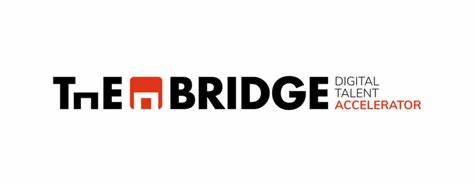

# Análisis Exploratorio de Datos (EDA):
## El comportamiendo del jugador en videojuegos online 🎮

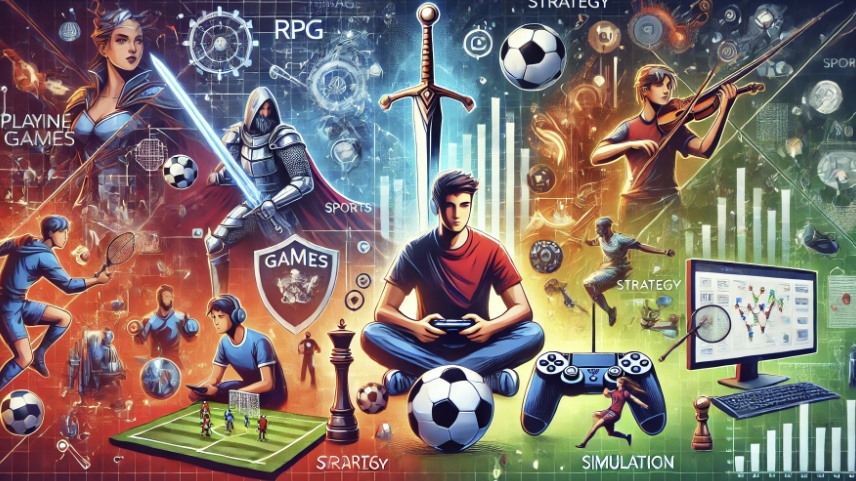

### Índice:
1. Contexto
2. Hipótesis
3. Importaciones
4. Vista general del dataset
5. Análisis de la muestra
6. Analisis Univariante
7. Análisis Bivariante: Compras
8. Análisis Bivariante: Engagement
9. Análisis Multivariante: Mapa de calor y Matriz de correlación.
10. Análisis adicionales
11. Agrupaciones
12. Conclusiones




### Contexto

Nos planteamos el hipotético caso en el que se busca optimizar la toma de decisiones para crear un videojuego online, que integre compras dentro del mismo. 
A partir de aquí surgen las siguientes preguntas e hipótesis.


### Hipótesis:
- Los jugadores con mayor engagement tienden a realizar más compras dentro del juego.
    - ¿Qué variables influyen en la decisión de compra?
    - ¿Existe algún género que concentre más compras?

- El nivel de engagement influye en el tiempo de juego dedicado. 
    - ¿Qué géneros de juego generan mayor engagement?
    - ¿En qué genero de juego se concentra un mayor número de inicios de sesión a la semana?
    - ¿Son más populares los juegos que tienen mayor engagement?


### Importaciones 

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
sys.path.append(os.path.abspath('C:/Users/gserr/TB_Blanca/Apuntes/Sprint_08/EDA/Datasets/src/utils'))

from funciones_eda import *

### Vista general del dataset

In [ ]:
#Se construye una ruta relativa para acceder a la carpeta donde se encuentran los datos.
ruta_data = os.path.join("src", "data", "online_gaming_behavior_dataset.csv")

#Visualizacion de datos en dataframe.
df_game_behaviour = pd.read_csv(ruta_data)

df_game_behaviour

PlayerID  Age  Gender Location   GameGenre  PlayTimeHours  \
0          9000   43    Male    Other    Strategy      16.271119   
1          9001   29  Female      USA    Strategy       5.525961   
2          9002   22  Female      USA      Sports       8.223755   
3          9003   35    Male      USA      Action       5.265351   
4          9004   33    Male   Europe      Action      15.531945   
...         ...  ...     ...      ...         ...            ...   
40029     49029   32    Male      USA    Strategy      20.619662   
40030     49030   44  Female    Other  Simulation      13.539280   
40031     49031   15  Female      USA         RPG       0.240057   
40032     49032   34    Male      USA      Sports      14.017818   
40033     49033   19    Male      USA      Sports      10.083804   

       InGamePurchases GameDifficulty  SessionsPerWeek  \
0                    0         Medium                6   
1                    0         Medium                5   
2                    0           Easy               16   
3                    1           Easy                9   
4                    0         Medium                2   
...                ...            ...              ...   
40029                0           Easy                4   
40030                0           Hard               19   
40031                1           Easy               10   
40032                1         Medium                3   
40033                0           Easy               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                            108           79                    25   
1                            144           11                    10   
2                            142           35                    41   
3                             85           57                    47   
4                            131           95                    37   
...                          ...          ...                   ...   
40029                         75           85                    14   
40030                        114           71                    27   
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

      EngagementLevel  
0              Medium  
1              Medium  
2                High  
3              Medium  
4              Medium  
...               ...  
40029          Medium  
40030            High  
40031            High  
40032          Medium  
40033          Medium  

[40034 rows x 13 columns]

In [ ]:
df_game_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [ ]:
df_game_behaviour.describe()

PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000                  52.000000     25.000000   
50%           9.000000                  95.000000     49.000000   
75%          14.000000                 137.000000     74.000000   
max          19.000000                 179.000000     99.000000   

       AchievementsUnlocked  
count          40034.000000  
mean              24.526477  
std               14.430726  
min                0.000000  
25%               12.000000  
50%               25.000000  
75%               37.000000  
max               49.000000

In [ ]:
#Visualización general de frecuencia de valores por cada columna del DataFrame. 
for columna in df_game_behaviour:
    print(f"Frecuencia de valores en: {df_game_behaviour[columna].value_counts()}")
    print("")

Frecuencia de valores en: PlayerID
49033    1
9000     1
49017    1
49016    1
49015    1
        ..
9006     1
9005     1
9004     1
9003     1
9002     1
Name: count, Length: 40034, dtype: int64

Frecuencia de valores en: Age
31    1228
37    1219
27    1217
40    1202
42    1187
29    1187
43    1180
18    1167
44    1166
32    1163
36    1154
24    1153
35    1151
22    1150
30    1150
17    1149
38    1140
19    1139
16    1138
23    1130
39    1128
21    1128
33    1123
46    1121
20    1113
41    1111
25    1108
28    1108
45    1108
26    1107
49    1106
34    1103
47    1102
15    1101
48    1097
Name: count, dtype: int64

Frecuencia de valores en: Gender
Male      23959
Female    16075
Name: count, dtype: int64

Frecuencia de valores en: Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

Frecuencia de valores en: GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count

In [ ]:
df_game_behaviour.nunique()

PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

### Análisis general de la muestra

#### Tipificación de los datos y clasificación de variables

In [9]:
df_clasificacion = clasificador_variables(df_game_behaviour, 10, 10)
df_clasificacion

Cardinalidad %_Cardinalidad     Tipo  \
PlayerID                         40034          100.0    int64   
Age                                 35       0.087426    int64   
Gender                               2       0.004996   object   
Location                             4       0.009992   object   
GameGenre                            5       0.012489   object   
PlayTimeHours                    40034          100.0  float64   
InGamePurchases                      2       0.004996    int64   
GameDifficulty                       3       0.007494   object   
SessionsPerWeek                     20       0.049958    int64   
AvgSessionDurationMinutes          170       0.424639    int64   
PlayerLevel                         99        0.24729    int64   
AchievementsUnlocked                50       0.124894    int64   
EngagementLevel                      3       0.007494   object   

                               Tipo_Variable  
PlayerID                   Numérica continua  
Age                        Numérica discreta  
Gender                               Binaria  
Location                          Categórica  
GameGenre                         Categórica  
PlayTimeHours              Numérica continua  
InGamePurchases                      Binaria  
GameDifficulty                    Categórica  
SessionsPerWeek            Numérica discreta  
AvgSessionDurationMinutes  Numérica discreta  
PlayerLevel                Numérica discreta  
AchievementsUnlocked       Numérica discreta  
EngagementLevel                   Categórica

#### Observaciones de la clasificación:
 - No se realiza limpieza de datos tras verificar que el dataset ya ha sido tratado.
 - Datos muy homogéneos, aparentemente como resultado del tratamiento previo de datos.
 - Hay poca variabilidad en los datos. A pesar de que la muestra es grande, la cardinalidad en las variables numéricas nos es muy alta si la comparamos con el total de datos. 
 - Existen variables con una cardinalidad del 100% y que podrían obviarse dentro del estudio (PlayerId). 
 

#### Definición de los datos:

- __Dataset__: online_gaming_behavior_dataset.csv
    - Fuente: Rabie El Kharoua. (2024). 🎮 Predict Online Gaming Behavior Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8742674
- __Descripción__: Datos demográficos y métricas sobre una muestra que recoge el comportamiento del jugador en juegos online. 
- __Periodo__: 2024 

Columna/Variable | Descripción	| Tipo_de_Variable	| Importancia Inicial	| Nota
---------------- | ------------ | --------------	| ----------------------| ------
PlayerID         | Identificación del jugador | Numérica Continua | - | 
Age         | Edad del jugador | Numérica Discreta | 3 | 
Gender       | Sexo del jugador | Binaria | 3 | 
Location         | Zona geográfica del jugador | Categórica Nominal| 2 | 
Genre        | Género del juego | Categórica Nominal | 1 | 
PlayTimeHours | Promedio de tiempo jugado por sesión |Numérica Continua| 1 | En horas 
InGamePurchases | Compras realizadas en el juego | Binaria | 0 | 0 = No, 1 = Sí
GameDifficulty | Nivel de dificultad del juego |Categórical Ordinal| 3 | Facil, medio, difícil
SessionsPerWeek | Número de sesiones de juego por semana | Numérica Discreta | 1 |
AvgSessionDurationMinutes | Duración media por sesión | Numérica Discreta | 3 | En minutos
PlayerLevel | Nivel del jugador en el juego | Numérica Discreta| 3 | 
AchievementsUnlocked  | Numero de logros desbloqueados en el juego |Numérica Discreta | 2 | Suelen ser premios/medallas/distinciones por misiones completadas
EngagementLevel | Nivel de engagement del jugador | Categórica Ordinal | 0 | Bajo, medio, alto

#### Tendencia Central

##### Media
Variables numéricas

In [10]:
df_game_behaviour.describe().loc["mean"]

PlayerID                     29016.500000
Age                             31.992531
PlayTimeHours                   12.024365
InGamePurchases                  0.200854
SessionsPerWeek                  9.471774
AvgSessionDurationMinutes       94.792252
PlayerLevel                     49.655568
AchievementsUnlocked            24.526477
Name: mean, dtype: float64

Observaciones:
- La media de edad de los jugadores de la muestra es de 32 años
- El tiempo invertido de juego es elevado; 12h de media por sesión, más de 9 sesiones a la semana 
- La media en compras es muy baja.


##### Mediana
Comprobaciones y comparación con la media

In [11]:
df_game_behaviour.describe().loc["50%"]

PlayerID                     29016.500000
Age                             32.000000
PlayTimeHours                   12.008002
InGamePurchases                  0.000000
SessionsPerWeek                  9.000000
AvgSessionDurationMinutes       95.000000
PlayerLevel                     49.000000
AchievementsUnlocked            25.000000
Name: 50%, dtype: float64

Observaciones:
- Tanto la media como la mediana tienen valores similares.
- Parece que no haya outliers o datos muy dispares.
- Comprobamos los valores máximos:


In [12]:
df_game_behaviour.describe().loc["max"]

PlayerID                     49033.000000
Age                             49.000000
PlayTimeHours                   23.999592
InGamePurchases                  1.000000
SessionsPerWeek                 19.000000
AvgSessionDurationMinutes      179.000000
PlayerLevel                     99.000000
AchievementsUnlocked            49.000000
Name: max, dtype: float64

##### Moda
Variables categóricas

In [13]:
# Pasamos las variables categóricas a una lista.
categoricas = [ "Gender",
                "Location",
                "GameGenre",
                "GameDifficulty",
                "EngagementLevel",
]
                
df_game_behaviour[categoricas].mode().T #Obtenemos la moda de cada categórica y transponemos el dataframe para una mejor visualización

0
Gender             Male
Location            USA
GameGenre        Sports
GameDifficulty     Easy
EngagementLevel  Medium

Observaciones:
- La mayoría de jugadores son hombres de Norteamérica.
- Aparentemente, el género más popular es el de deportes, aunque por muy poca diferencia con el resto.
- El nivel de dificultad más jugado es en modo fácil.
- El nivel de engagement que más se repite es medio. 

### Análisis Univariante

#### Frecuencias Absolutas

In [14]:
categoricas_2 =  [ "Gender",
                "Location",
                "GameGenre",
                "GameDifficulty",
                "EngagementLevel",
                "InGamePurchases" #En este caso vamos a incluir nuestra variable directoria InGamePurchase como categórica para ver su frecuencia:
]

In [15]:
#Vemos los valores únicos de cada categórica:
for categoria in categoricas_2:
    print(f"Valores únicos en {categoria}")
    print(df_game_behaviour[categoria].value_counts())
    print("")

Valores únicos en Gender
Gender
Male      23959
Female    16075
Name: count, dtype: int64

Valores únicos en Location
Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

Valores únicos en GameGenre
GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

Valores únicos en GameDifficulty
GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64

Valores únicos en EngagementLevel
EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

Valores únicos en InGamePurchases
InGamePurchases
0    31993
1     8041
Name: count, dtype: int64



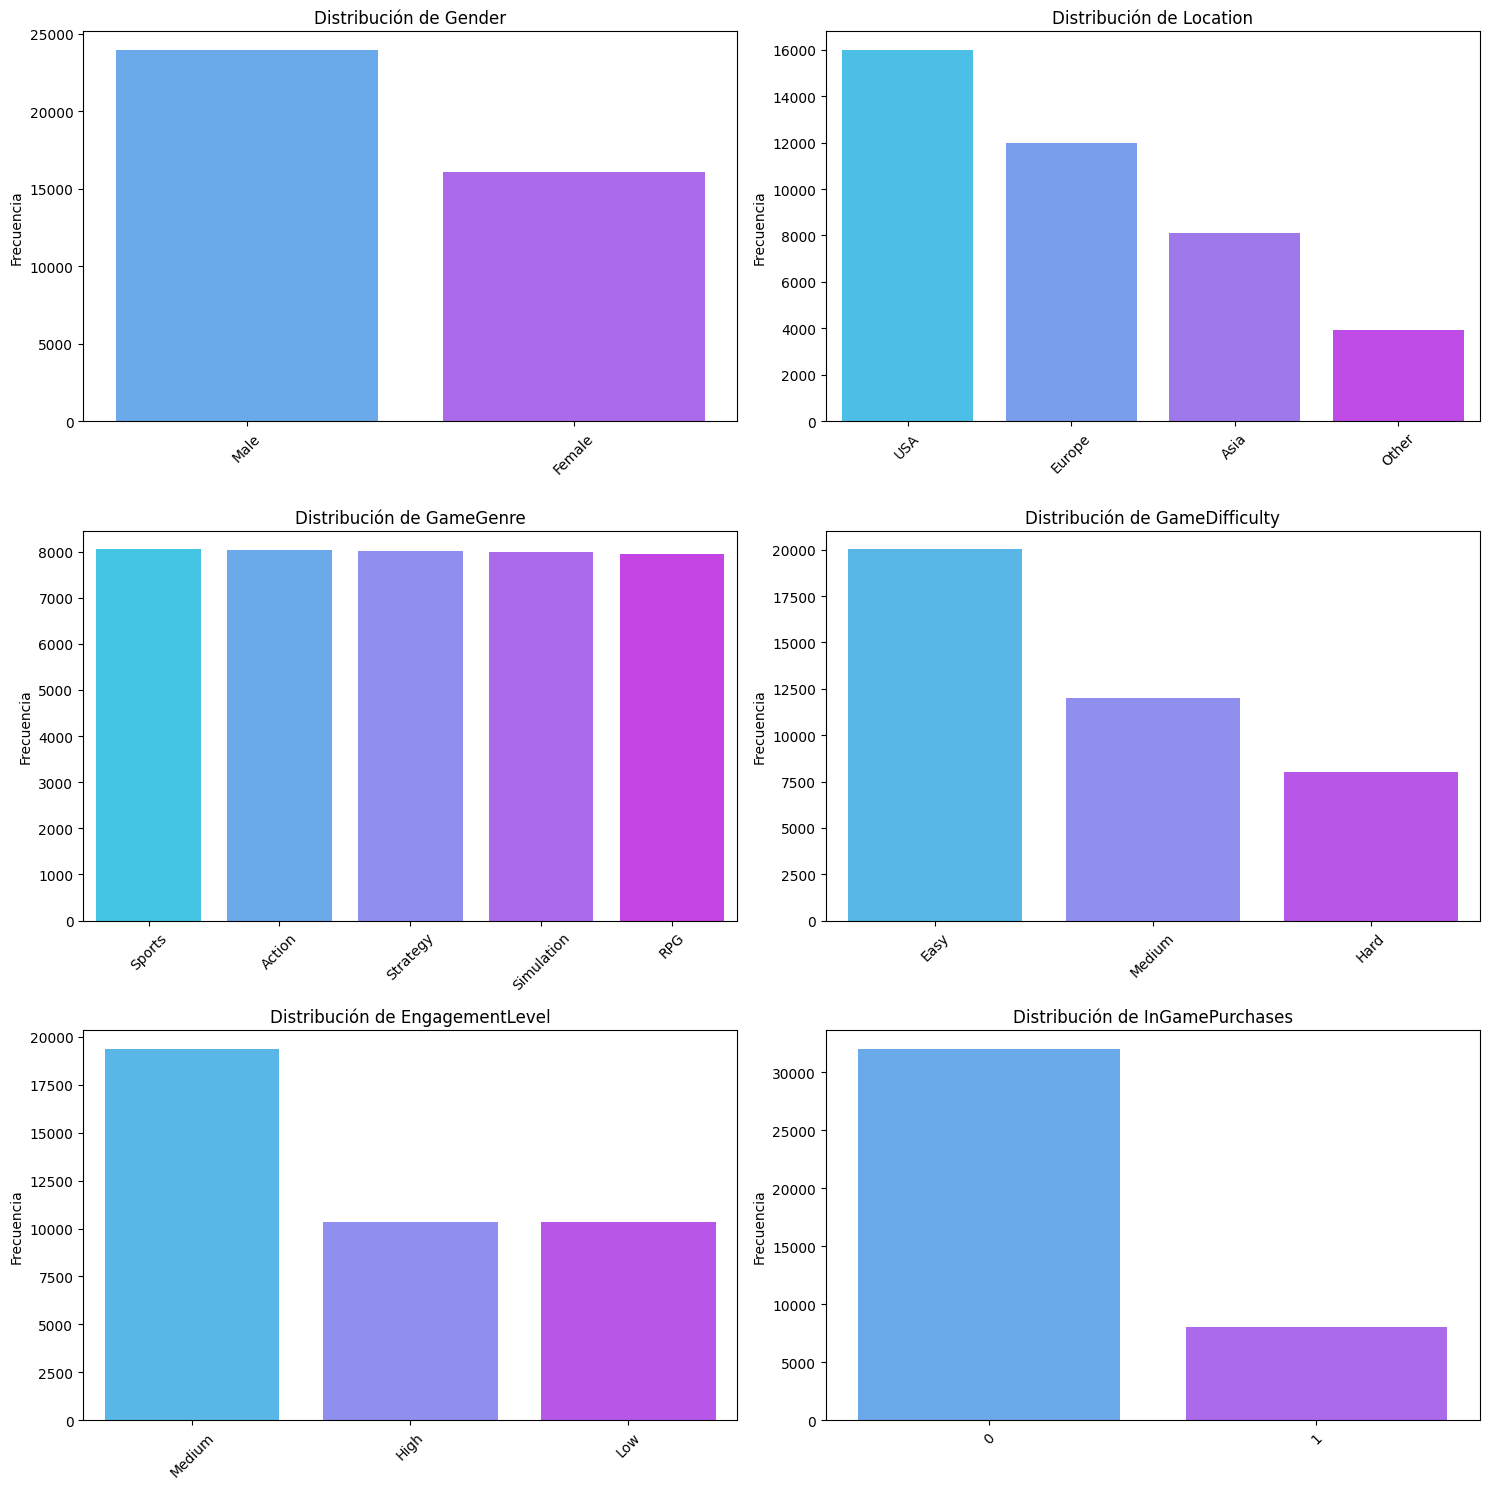

In [16]:
#Vemos representación gráfica:
pinta_distribucion_categoricas(df_game_behaviour, categoricas_2)

##### Frecuencia Relativa

In [17]:
#Vemos los valores únicos de cada categórica:
for categoria in categoricas_2:
    print(f"Valores únicos en {categoria}")
    print(df_game_behaviour[categoria].value_counts()/len(df_game_behaviour)*100)
    print("")

Valores únicos en Gender
Gender
Male      59.84663
Female    40.15337
Name: count, dtype: float64

Valores únicos en Location
Location
USA       39.966029
Europe    29.984513
Asia      20.220313
Other      9.829145
Name: count, dtype: float64

Valores únicos en GameGenre
GameGenre
Sports        20.102913
Action        20.080432
Strategy      20.012989
Simulation    19.940551
RPG           19.863116
Name: count, dtype: float64

Valores únicos en GameDifficulty
GameDifficulty
Easy      49.995004
Medium    30.001998
Hard      20.002997
Name: count, dtype: float64

Valores únicos en EngagementLevel
EngagementLevel
Medium    48.393865
High      25.818055
Low       25.788080
Name: count, dtype: float64

Valores únicos en InGamePurchases
InGamePurchases
0    79.914573
1    20.085427
Name: count, dtype: float64



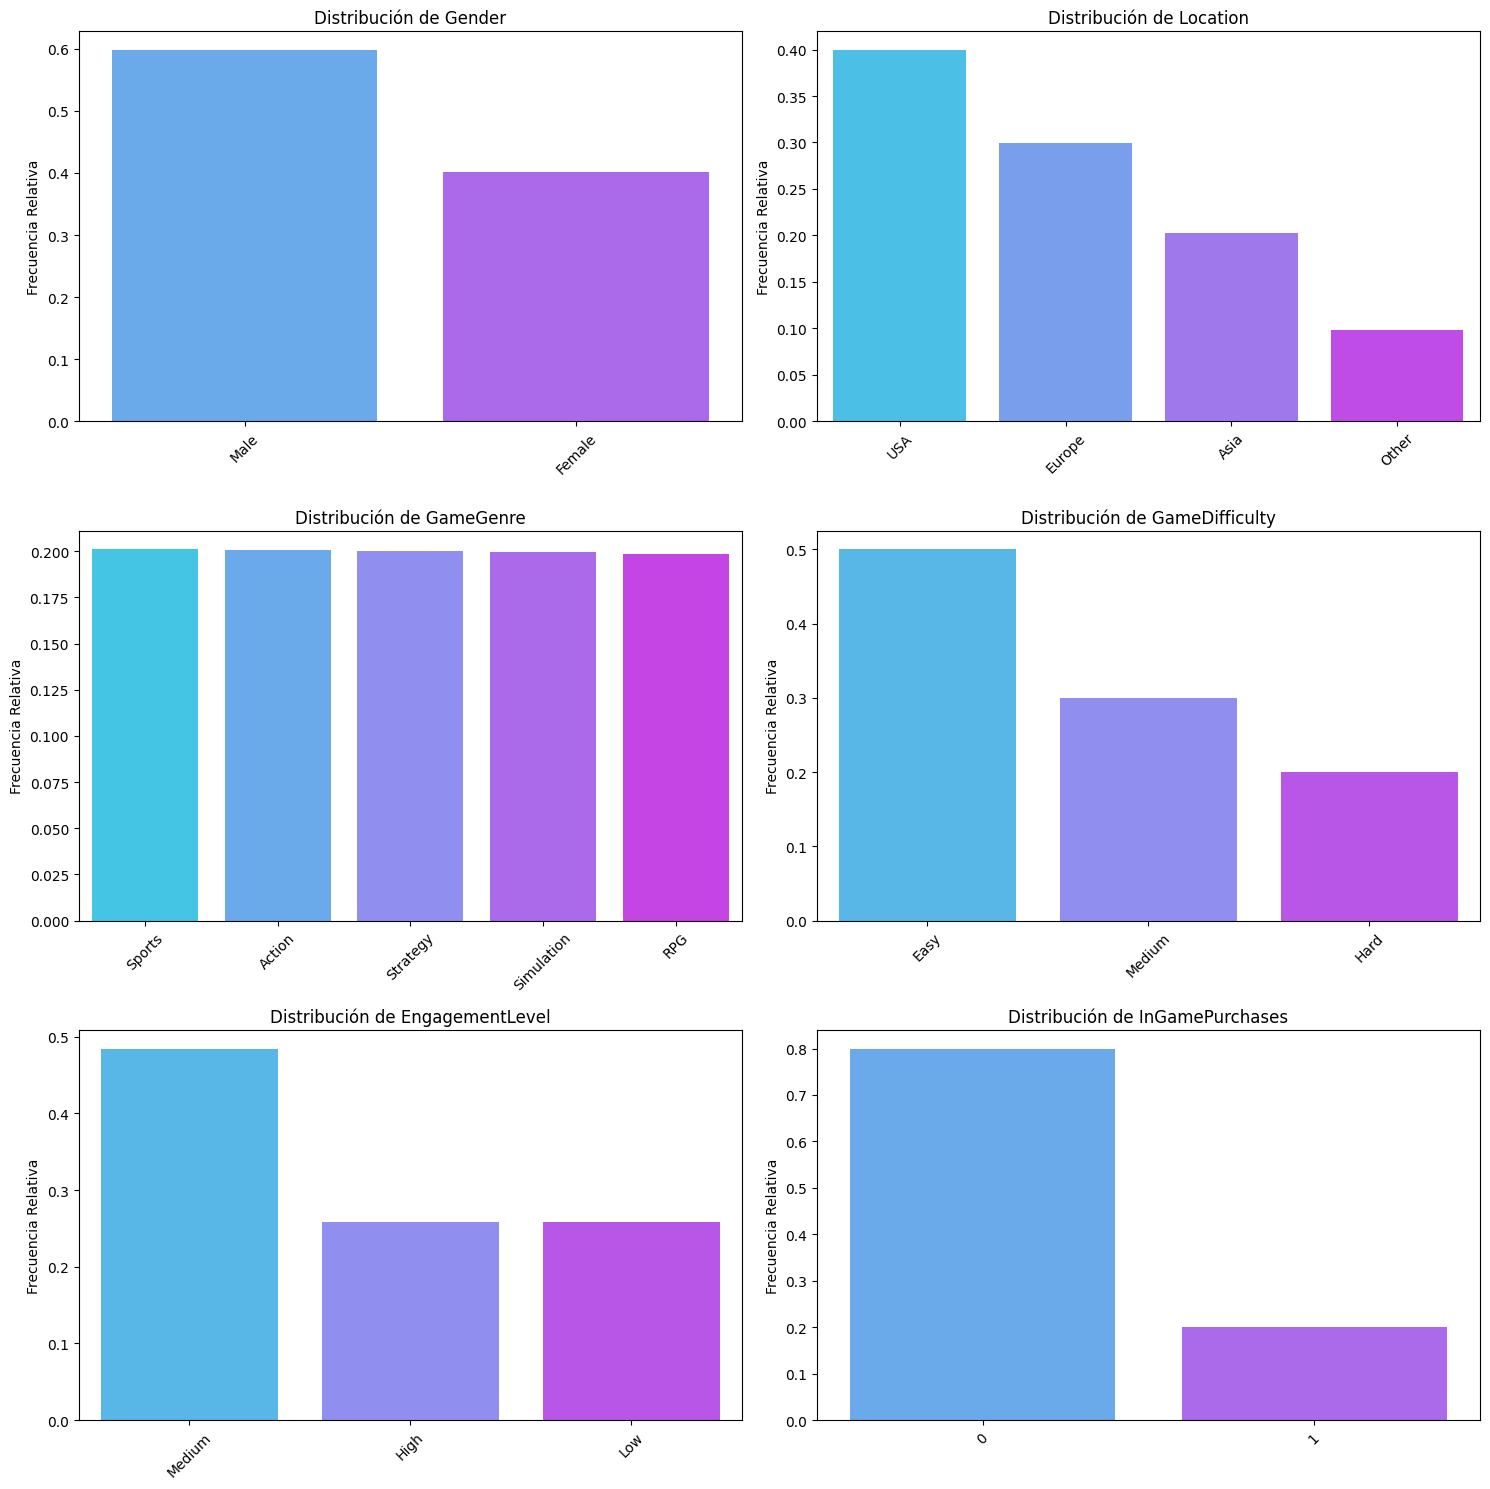

<Figure size 640x480 with 0 Axes>

In [129]:
#Vemos representación gráfica:
pinta_distribucion_categoricas(df_game_behaviour, categoricas_2, relativa=True)

Observaciones y preguntas:
- No existe una diferencia significativa de popularidad entre los géneros de juego. Siguiendo nuestras preguntas de hipótesis invita a investigar si existen géneros de juego con mayor engagement.
- El nivel de engagement que predomina es medio representando casi el 50% de la muestra. Los niveles de engagement más alto y más bajo representan el otro 50% de la muestra. ¿Qué otras variables influyen? ¿Influyen los logros conseguidos? ¿Se consiguen más logros en un niveles más fáciles?
- Las compras dentro del juego no son significativas. ¿Inflye alguna variable más que otra?


#### Medidas de posición y rangos

##### Cálculo del IQR y Rango de cada variable numérica: 

In [19]:
# Pasamos las variables numéricas a una lista.
# No se tiene en cuenta Player ID. Por otro lado, tampoco contamos con InGamePurchases ya que se ha considerado como categórica. 
numericas = [ "Age",
             "PlayTimeHours", 
             "SessionsPerWeek",
             "AvgSessionDurationMinutes", 
             "PlayerLevel",
             "AchievementsUnlocked"          
]

# Recorremos la lista para mostrar por pantalla el IQR, mediana y rango para poder compararlos: 
for variable in numericas:
    print(f"Para {variable}:")
    print(f"IQR: {get_IQR(df_game_behaviour, variable)}")
    print(f"Mediana: {df_game_behaviour[variable].describe().loc["50%"]}")
    print(f"Rango:{df_game_behaviour[variable].describe().loc["max"] - df_game_behaviour[variable].describe().loc["min"]}")
    print("")

Para Age:
IQR: 18.0
Mediana: 32.0
Rango:34.0

Para PlayTimeHours:
IQR: 11.89633063054563
Mediana: 12.00800215801307
Rango:23.999476946960538

Para SessionsPerWeek:
IQR: 10.0
Mediana: 9.0
Rango:19.0

Para AvgSessionDurationMinutes:
IQR: 85.0
Mediana: 95.0
Rango:169.0

Para PlayerLevel:
IQR: 49.0
Mediana: 49.0
Rango:98.0

Para AchievementsUnlocked:
IQR: 25.0
Mediana: 25.0
Rango:49.0



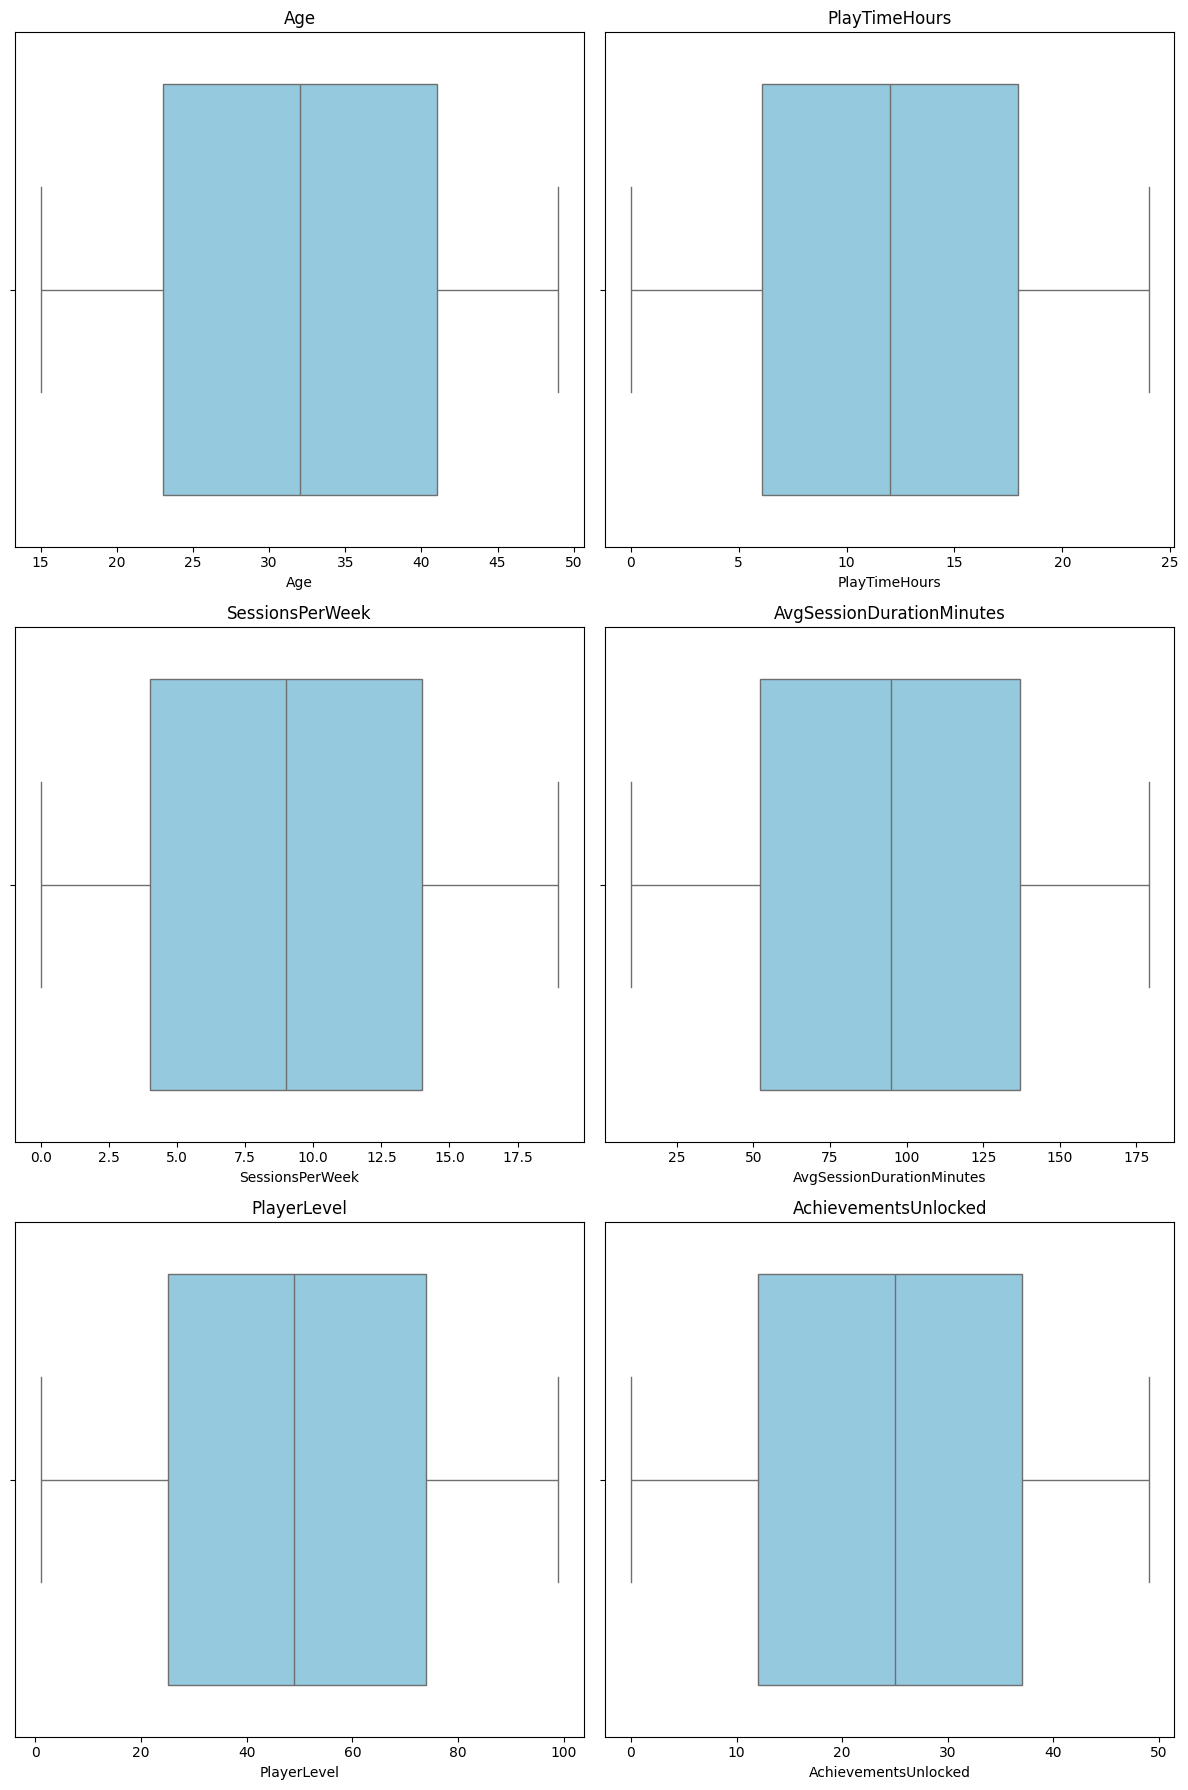

In [20]:
plot_multiple_boxplots(df_game_behaviour, numericas)

Observaciones:
- Las variables numéricas son homogéneas, no hay outliers. 
- Como se observaba anteriormente, la muestra ya ha sido previamente tratada por el creador del dataset para el análisis.


#### Medidas de dispersión

In [21]:
variabilidad(df_game_behaviour[numericas])

std       mean        CV
Age                        10.043227  31.992531  0.313924
PlayTimeHours               6.914638  12.024365  0.575052
SessionsPerWeek             5.763667   9.471774  0.608510
AvgSessionDurationMinutes  49.011375  94.792252  0.517040
PlayerLevel                28.588379  49.655568  0.575734
AchievementsUnlocked       14.430726  24.526477  0.588373

#### Distribución: Histograma y KDE

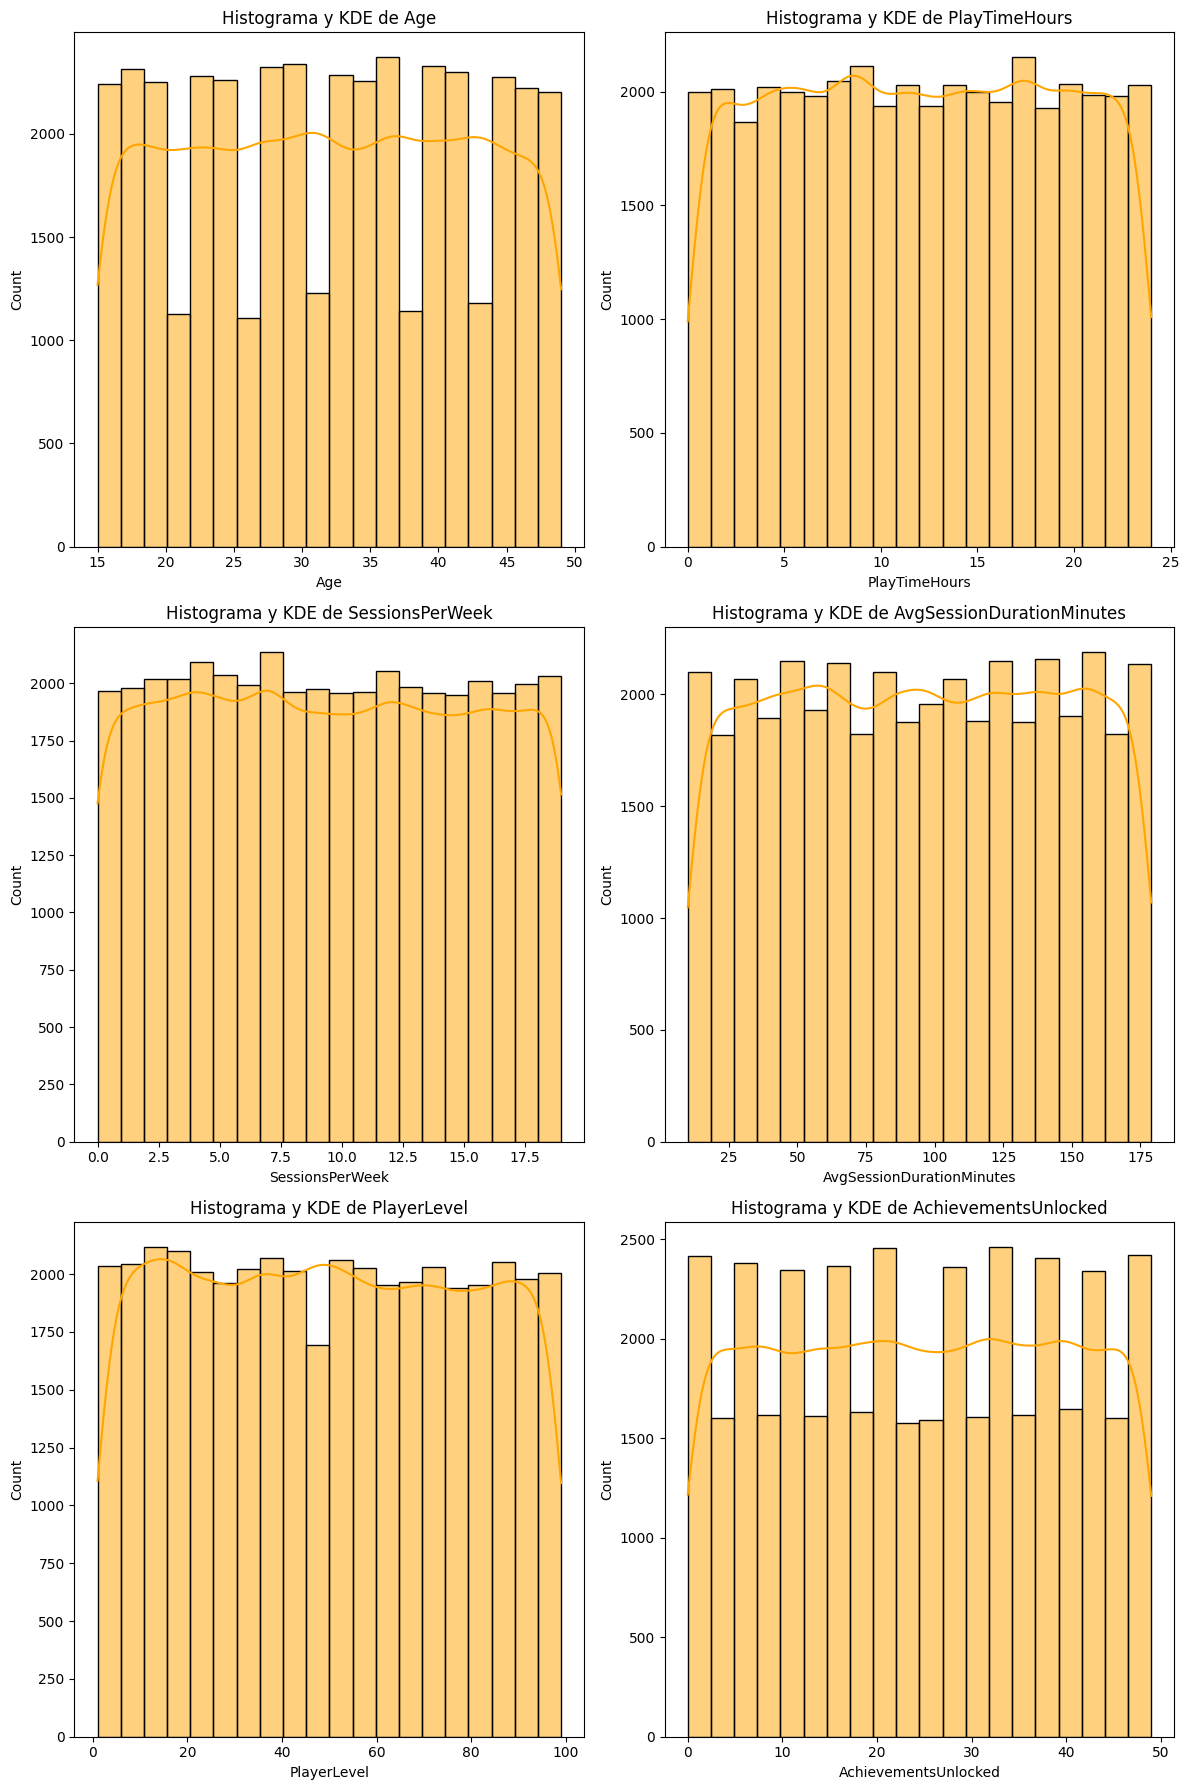

In [22]:
#Hacemos una vista general de todas la variables numéricas:
plot_histo_den(df_game_behaviour, numericas)

#### Revisión de Outliers
Apriori, no se observan outliers en la muestra.

(6, 2)


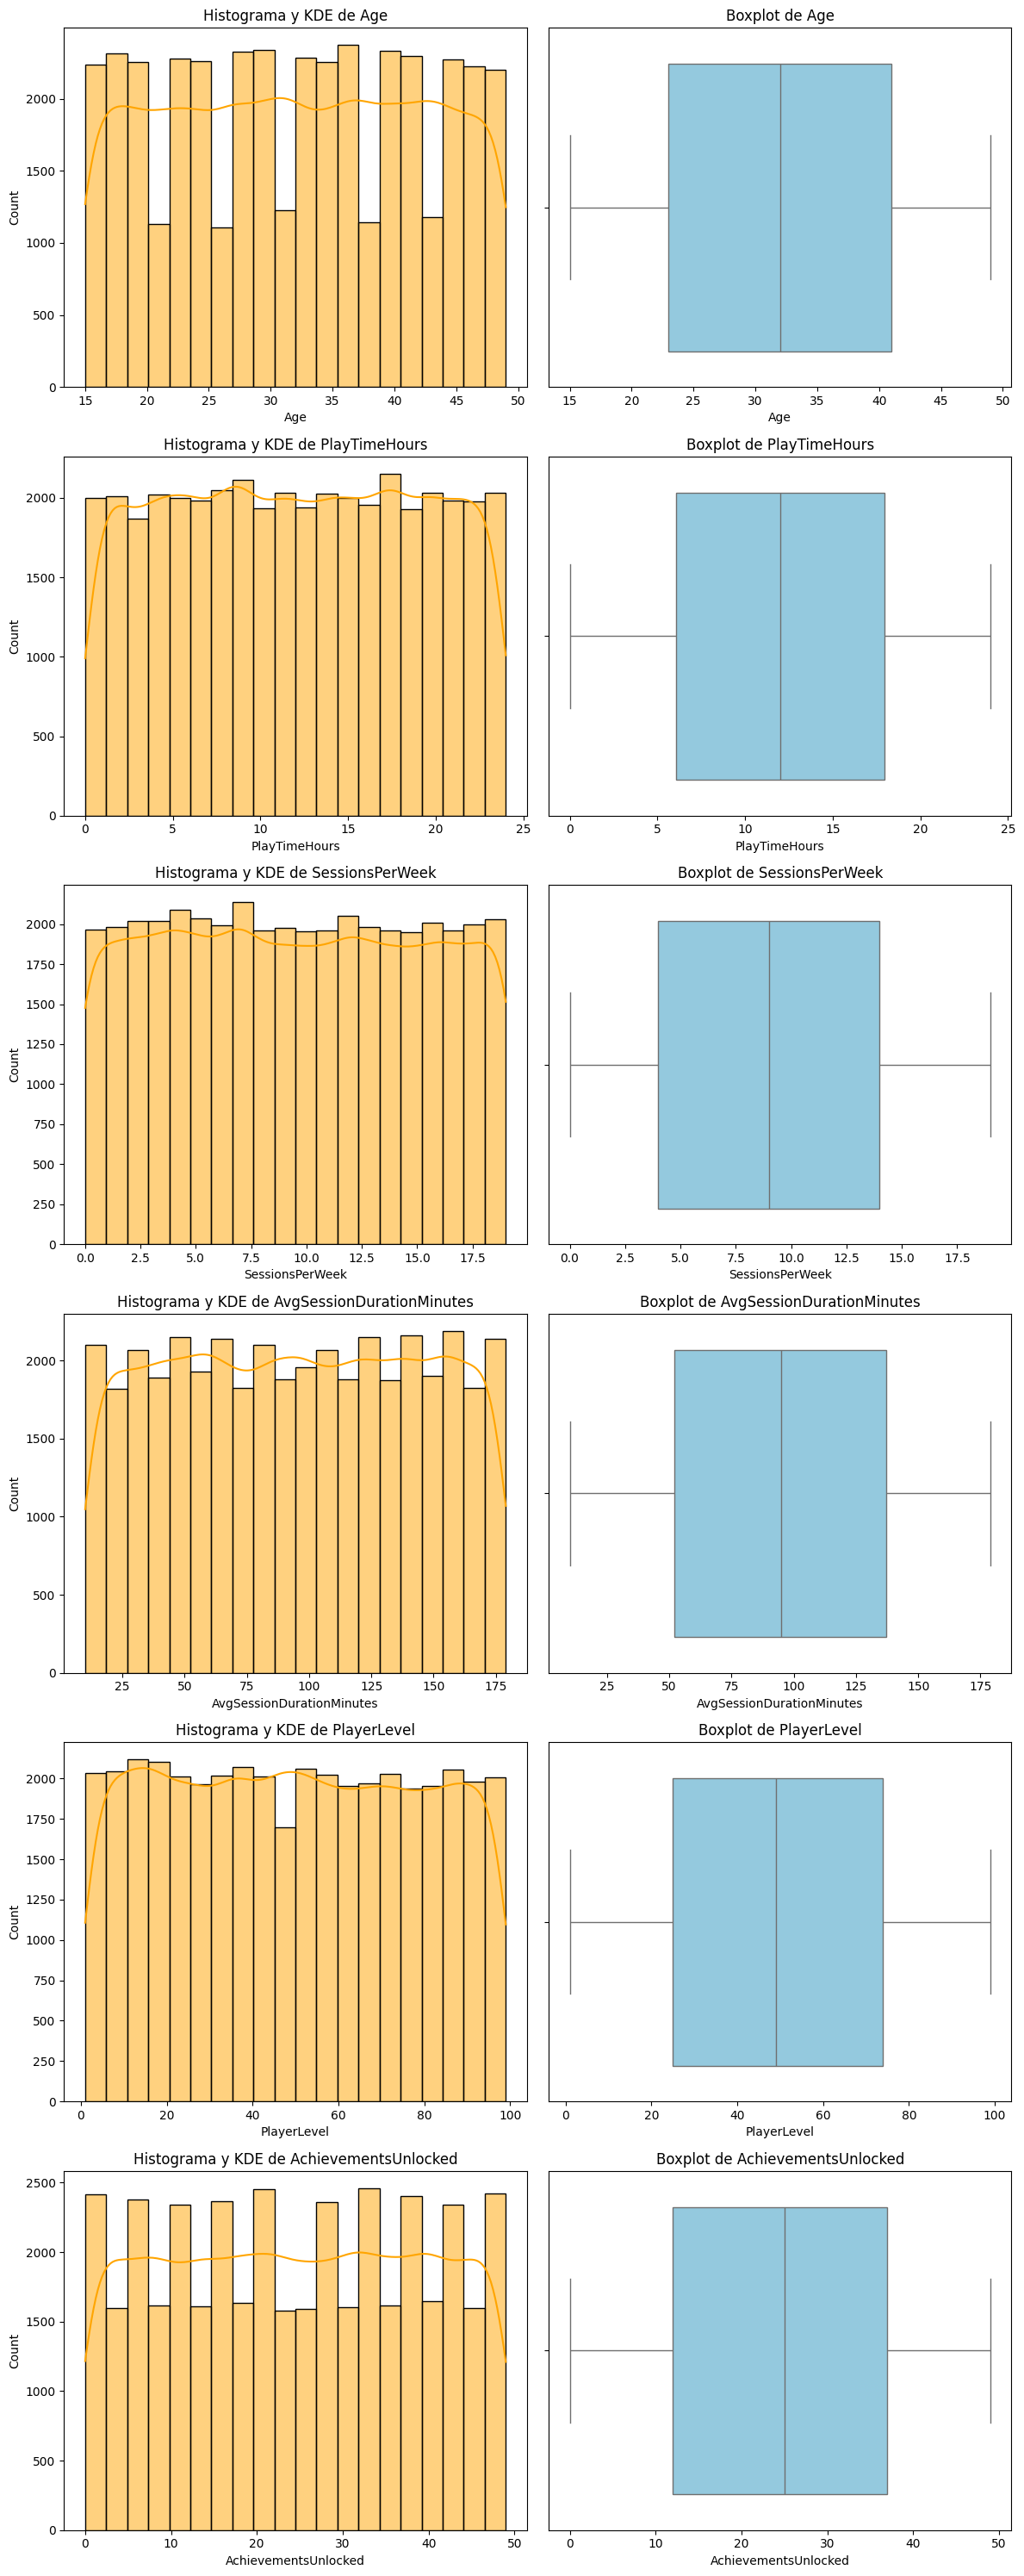

In [23]:
plot_combined_graphs(df_game_behaviour, numericas)

### Análisis Bivariante: Compras

#### Compras vs Engagement:

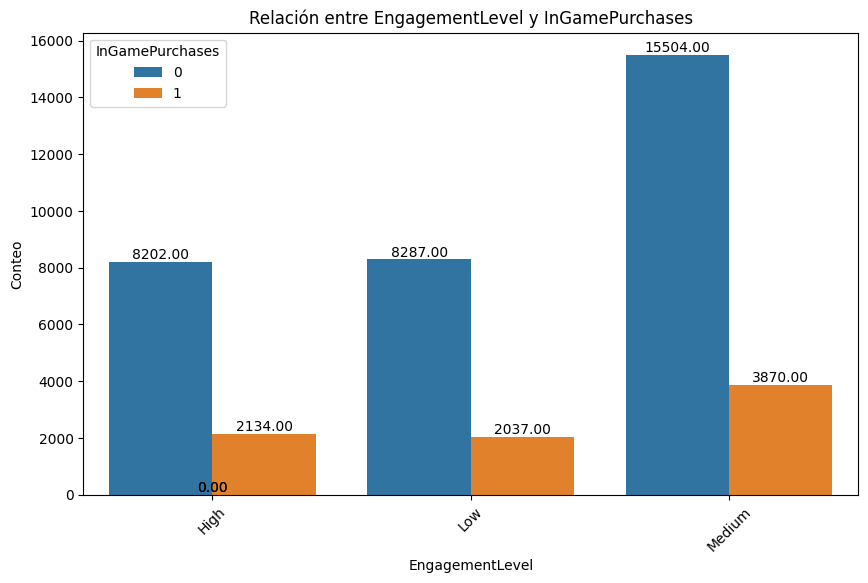

In [24]:
plot_categorical_relationship_fin(df_game_behaviour, "EngagementLevel", "InGamePurchases", relative_freq=False, show_values=True, size_group = 5)

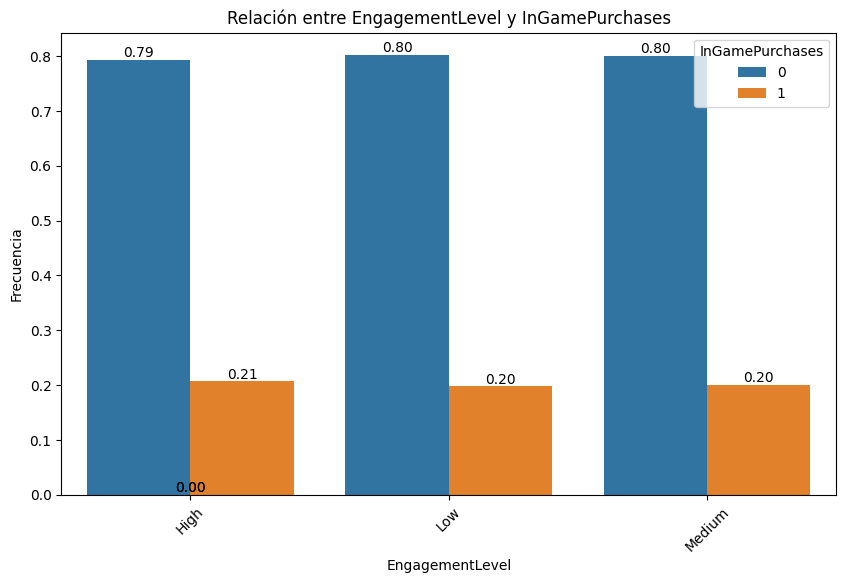

In [25]:
plot_categorical_relationship_fin(df_game_behaviour, "EngagementLevel", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

#### Compras vs Gender

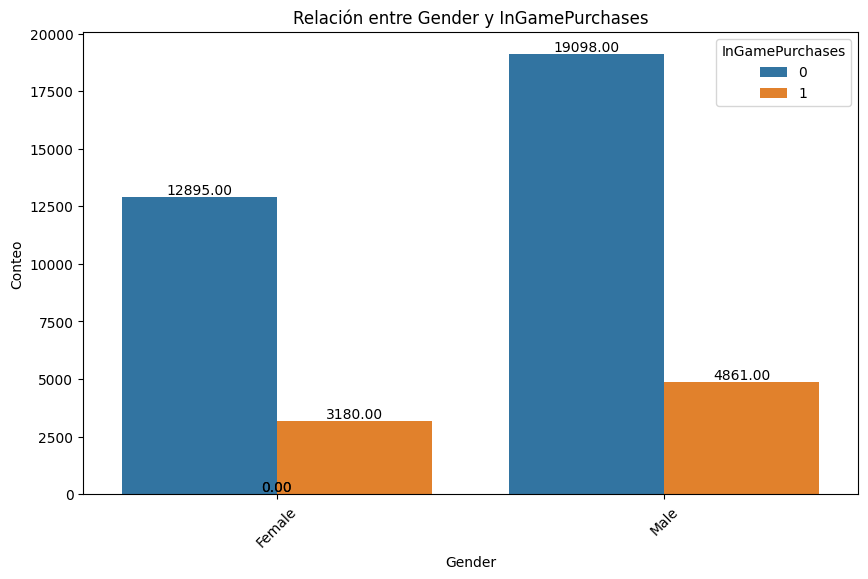

In [26]:
plot_categorical_relationship_fin(df_game_behaviour, "Gender", "InGamePurchases",  relative_freq=False, show_values=True, size_group = 5)

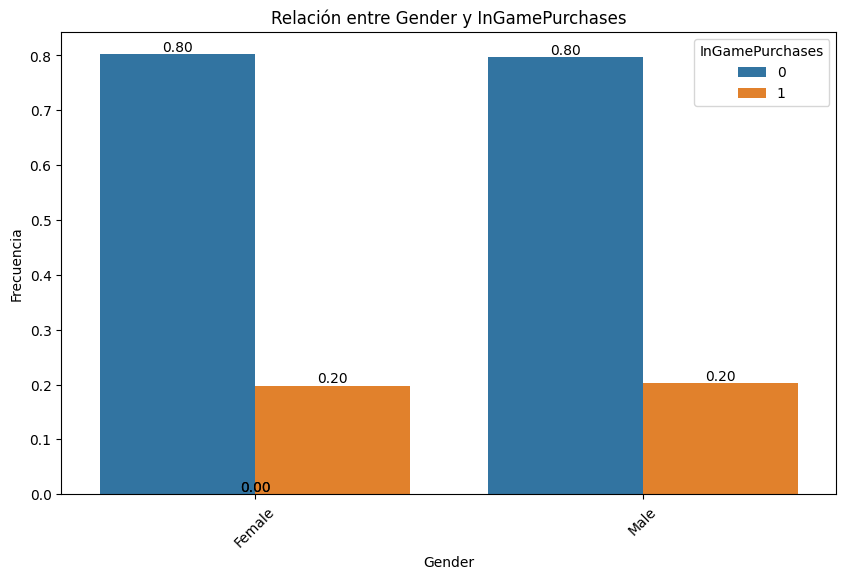

In [27]:
plot_categorical_relationship_fin(df_game_behaviour, "Gender", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

#### Compras vs Location

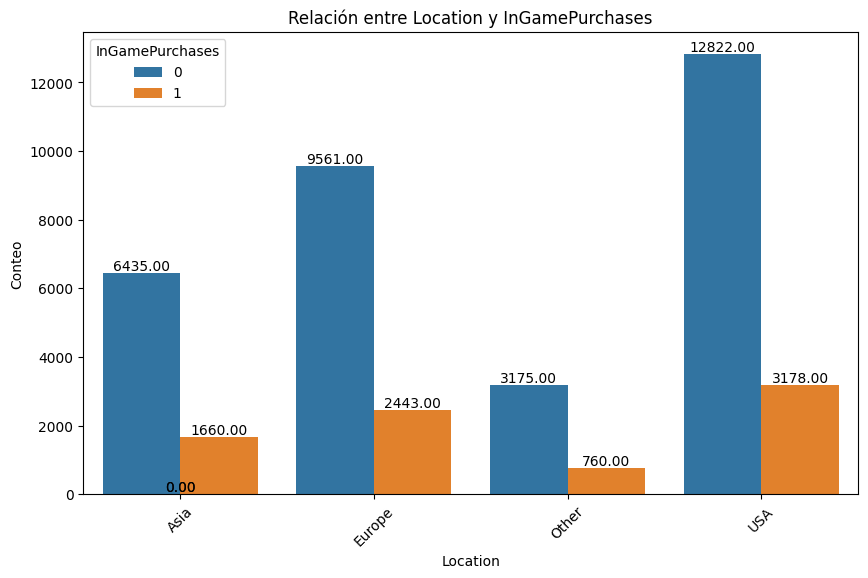

In [28]:
plot_categorical_relationship_fin(df_game_behaviour, "Location", "InGamePurchases",  relative_freq=False, show_values=True, size_group = 5)

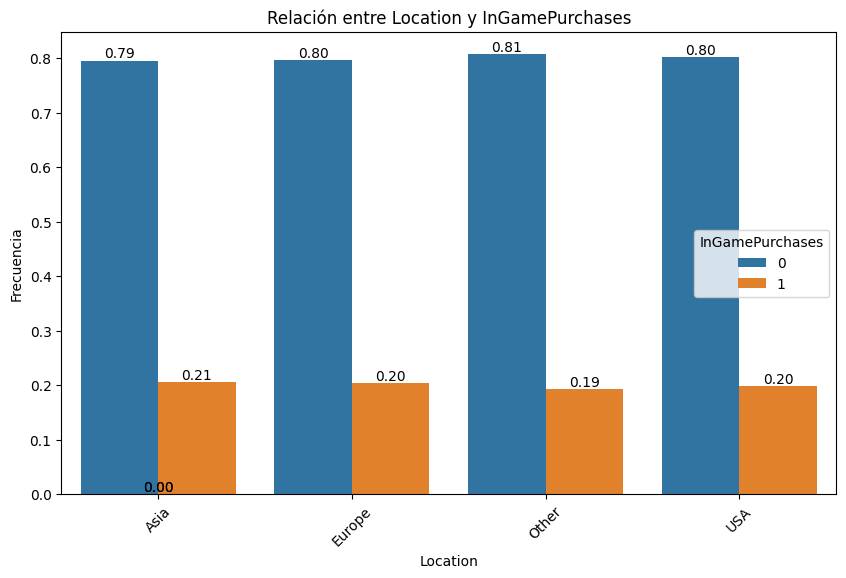

In [29]:
plot_categorical_relationship_fin(df_game_behaviour, "Location", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

#### Compras vs Género de Juego

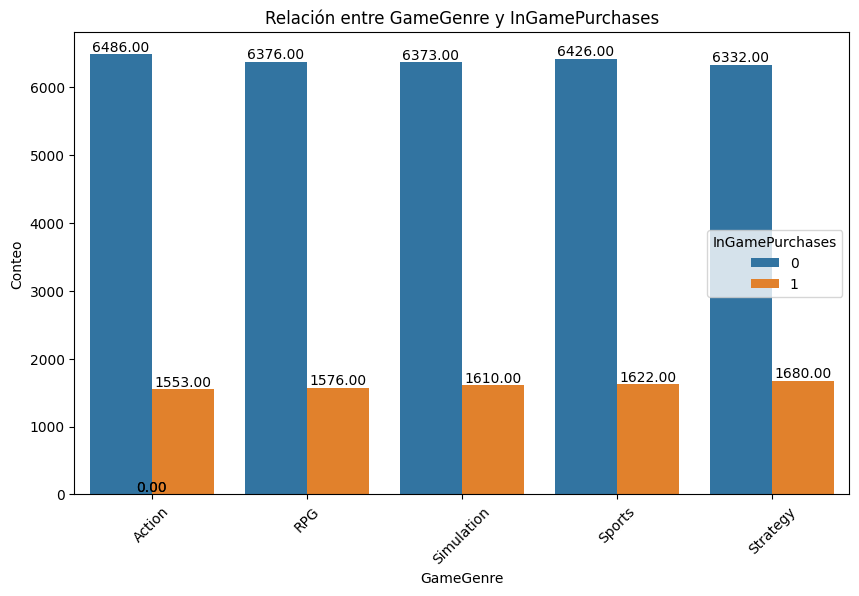

In [30]:
plot_categorical_relationship_fin(df_game_behaviour, "GameGenre", "InGamePurchases",  relative_freq=False, show_values=True, size_group = 5)

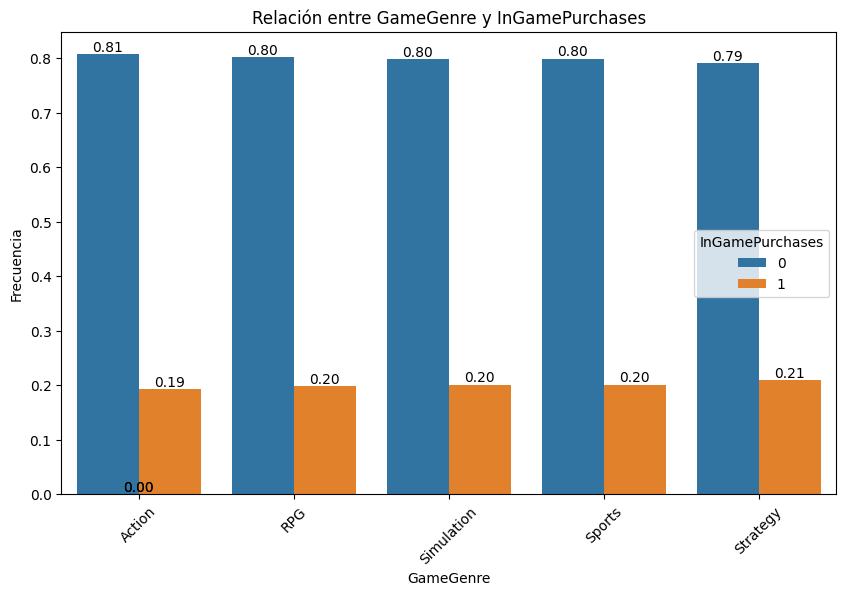

In [31]:
plot_categorical_relationship_fin(df_game_behaviour, "GameGenre", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

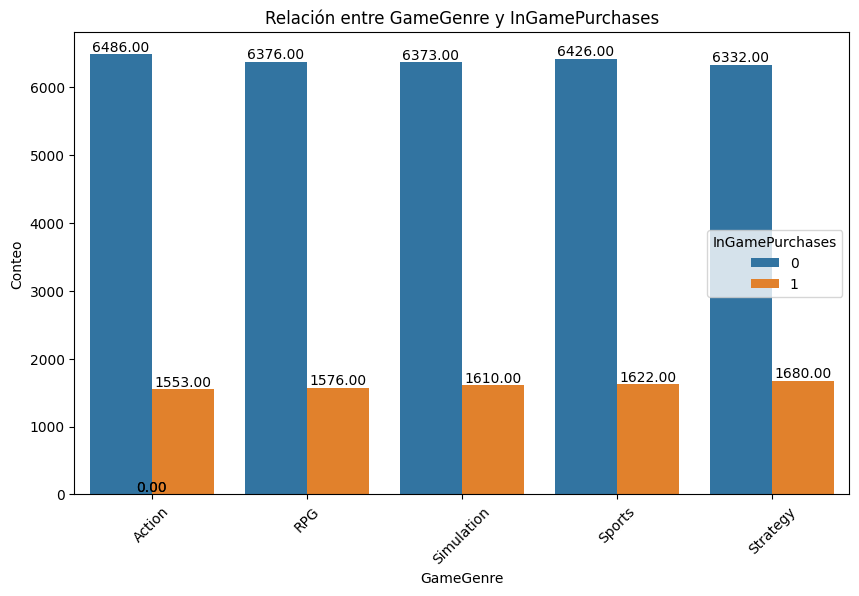

In [32]:
plot_categorical_relationship_fin(df_game_behaviour, "GameGenre", "InGamePurchases",  relative_freq=False, show_values=True, size_group = 5)

#### Compras vs Dificultad

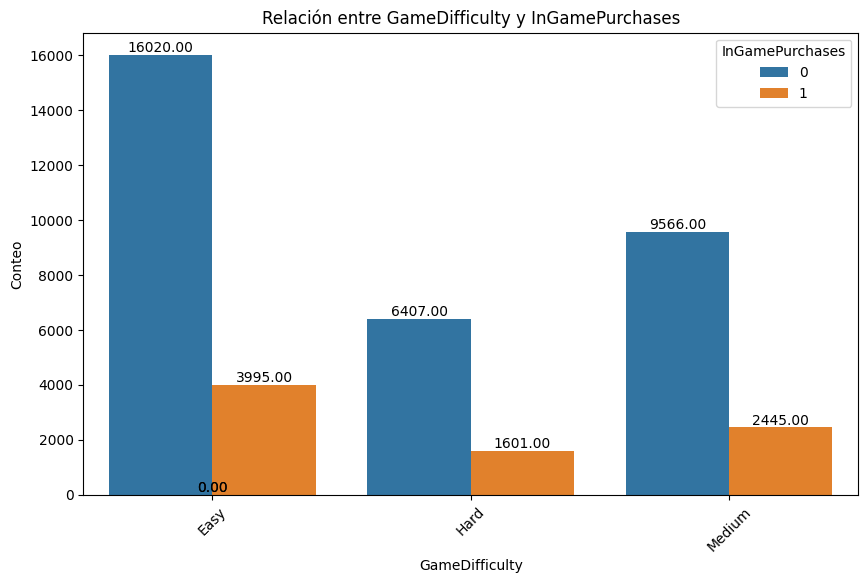

In [33]:
plot_categorical_relationship_fin(df_game_behaviour, "GameDifficulty", "InGamePurchases",  relative_freq=False, show_values=True, size_group = 5)

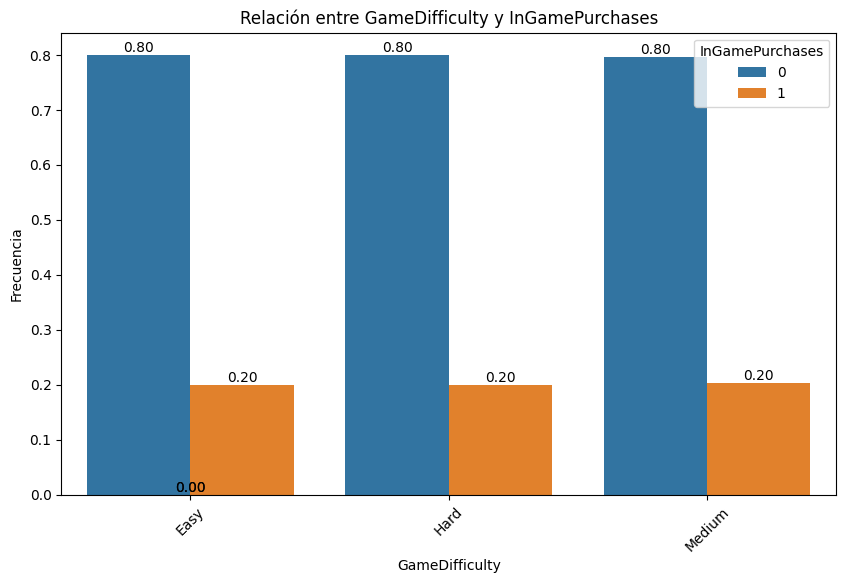

In [34]:
plot_categorical_relationship_fin(df_game_behaviour, "GameDifficulty", "InGamePurchases",  relative_freq=True, show_values=True, size_group = 5)

#### Observaciones:
- Como hemos visto al comparar las variables que hemos marcado como directoras y poniendo el foco en las frecuencias relativas, aparentemente no podemos afirmar que alguna las variables categóricas influyan significativamente sobre las compras. 
- Esto puede ser interesante a la hora de plantear estrategias de marketing para aumentar las compras dentro del juego, ya que según los datos, no son significativas. 
- Ya que aprentemente no nos arroja mucha más información, en el siguiente paso de análisis pasaremos a buscar directamente la relación entre las compras y el resto de variables (categóricas y numéricas), realizando test para aceptar o rechazat la hipótesis nula.

#### Análisis de Relación entre la variable Compras y el resto de variables
A pesar de las evidencias que hemos visto en las gráficas visuales, con el objetivo de poder aceptar o rechazar la hipótesis nula sobre la variable compras, visualizamos su distribución con respecto al resto de categóricas y realizamos test Chi-cuadrado. Para la comparación entre variables numéricas nos apoyamos en el test ANOVA.



#### Buscando la relación entre compras y engagement:

In [35]:
from scipy.stats import chi2_contingency

In [36]:
tabla_contingencia_purchase_engagement = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["EngagementLevel"])
tabla_contingencia_purchase_engagement

EngagementLevel  High   Low  Medium
InGamePurchases                    
0                8202  8287   15504
1                2134  2037    3870

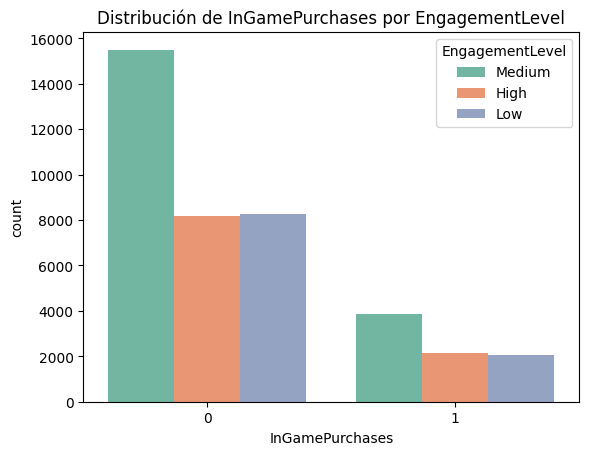

In [37]:
sns.countplot(df_game_behaviour, x="InGamePurchases", hue="EngagementLevel", palette="Set2")
plt.title("Distribución de InGamePurchases por EngagementLevel");

In [38]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_purchase_engagement)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 2.9813995085885474
P-Value: 0.2252150052205898
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 8259.97022531  8250.38047659 15482.6492981 ]
 [ 2076.02977469  2073.61952341  3891.3507019 ]]


#### Buscando la relación entre compras y género de juego:

In [39]:
tabla_contingencia_purchase_gamegenre = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["GameGenre"])
tabla_contingencia_purchase_gamegenre

GameGenre        Action   RPG  Simulation  Sports  Strategy
InGamePurchases                                            
0                  6486  6376        6373    6426      6332
1                  1553  1576        1610    1622      1680

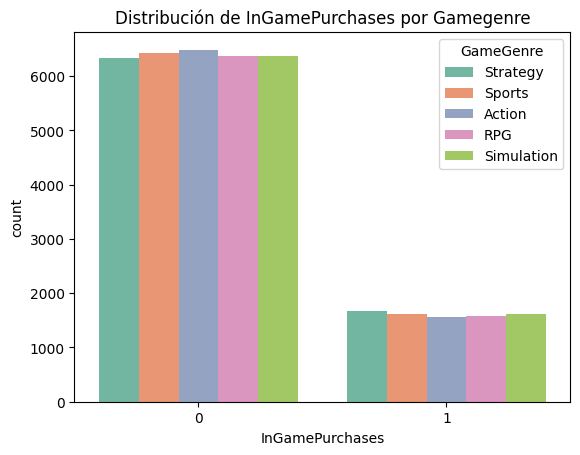

In [40]:
sns.countplot(df_game_behaviour, x="InGamePurchases", hue="GameGenre", palette="Set2")
plt.title("Distribución de InGamePurchases por Gamegenre");

In [41]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_purchase_gamegenre)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 7.249371812897175
P-Value: 0.12328242100389752
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[6424.33249238 6354.80681421 6379.58033172 6431.52480392 6402.75555778]
 [1614.66750762 1597.19318579 1603.41966828 1616.47519608 1609.24444222]]


#### Buscando la relación entre compras y sexo:

In [42]:
tabla_contingencia_purchase_gender = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["Gender"])
tabla_contingencia_purchase_gender

Gender           Female   Male
InGamePurchases               
0                 12895  19098
1                  3180   4861

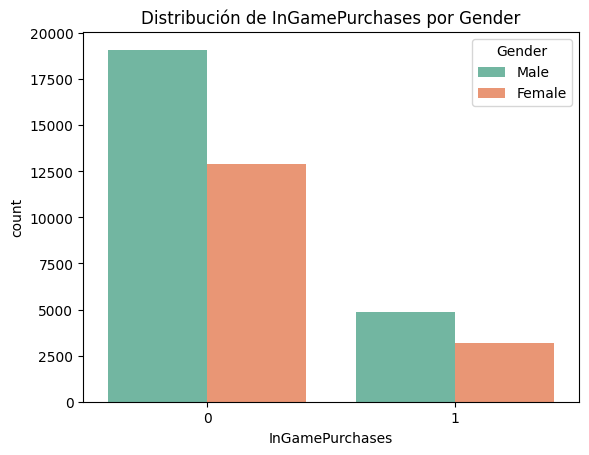

In [43]:
sns.countplot(df_game_behaviour, x="InGamePurchases", hue="Gender", palette="Set2")
plt.title("Distribución de InGamePurchases por Gender");

In [44]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_purchase_gender)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1.5065409685929265
P-Value: 0.21966766351402373
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[12846.26754758 19146.73245242]
 [ 3228.73245242  4812.26754758]]


#### Buscando la relación entre compras y localización:

In [45]:
tabla_contingencia_purchase_location = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["Location"])
tabla_contingencia_purchase_location

Location         Asia  Europe  Other    USA
InGamePurchases                            
0                6435    9561   3175  12822
1                1660    2443    760   3178

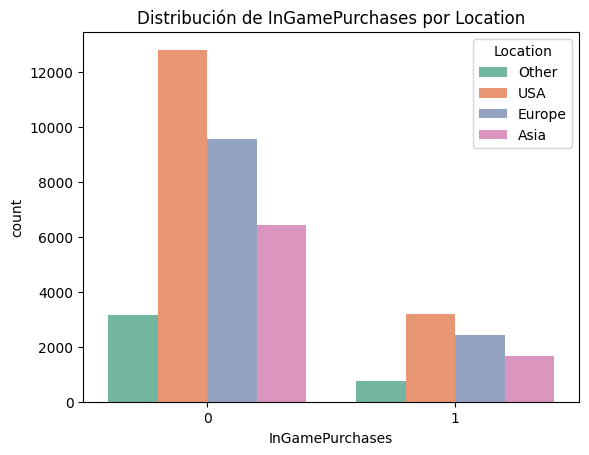

In [46]:
sns.countplot(df_game_behaviour, x="InGamePurchases", hue="Location", palette="Set2")
plt.title("Distribución de InGamePurchases por Location");

In [47]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_purchase_location)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 3.37861223123189
P-Value: 0.33685029773325126
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[ 6469.08465304  9592.9452965   3144.63843233 12786.33161812]
 [ 1625.91534696  2411.0547035    790.36156767  3213.66838188]]


#### Buscando la relación entre compras y dificultad:

In [48]:
tabla_contingencia_purchase_dificultad = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["GameDifficulty"])
tabla_contingencia_purchase_dificultad

GameDifficulty    Easy  Hard  Medium
InGamePurchases                     
0                16020  6407    9566
1                 3995  1601    2445

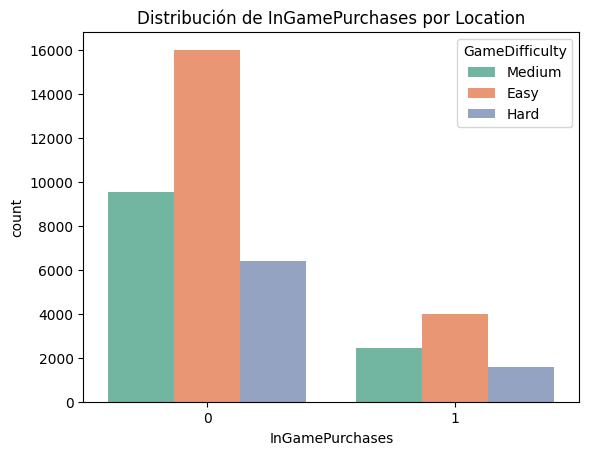

In [49]:
sns.countplot(df_game_behaviour, x="InGamePurchases", hue="GameDifficulty", palette="Set2")
plt.title("Distribución de InGamePurchases por Location");

In [50]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_purchase_dificultad)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.7883525860580769
P-Value: 0.6742351827998125
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[15994.90170855  6399.55897487  9598.53931658]
 [ 4020.09829145  1608.44102513  2412.46068342]]


#### Buscamos la relación entre compras y edad:

(2,)


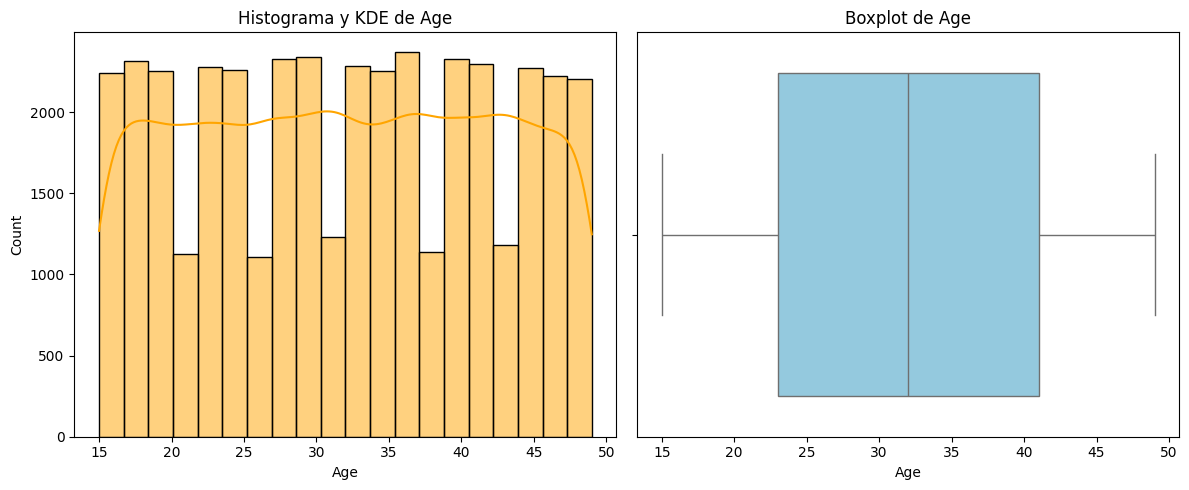

In [51]:
plot_combined_graphs(df_game_behaviour,["Age"]);

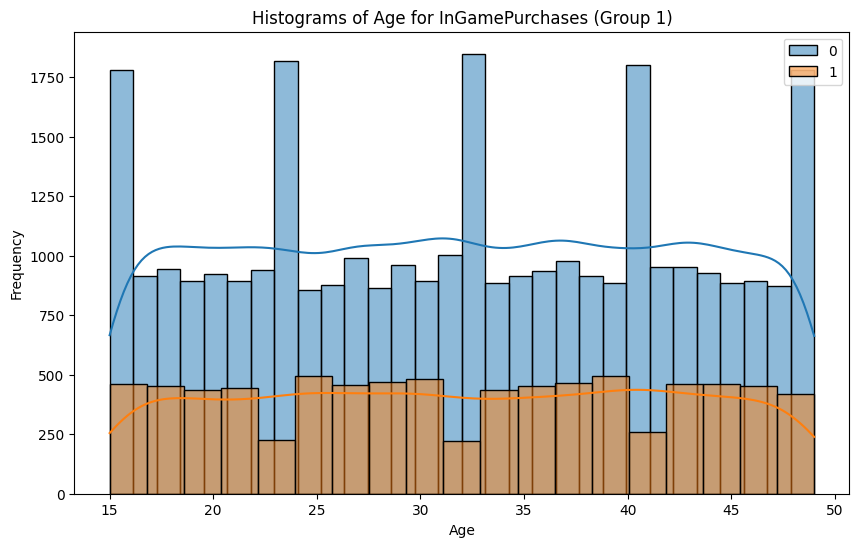

In [52]:
plot_grouped_histograms(df_game_behaviour, cat_col="InGamePurchases",num_col="Age", group_size= 2)

In [53]:
grupos = df_game_behaviour['InGamePurchases'].unique()  # Obtener los valores únicos de la variable categórica
age = [df_game_behaviour[df_game_behaviour['InGamePurchases'] == grupo]['Age'] for grupo in grupos] # vemos las edades y lo metemos en una lista

f_val, p_val = stats.f_oneway(*age) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 0.0013833841863748395
Valor p: 0.9703306093272384


#### Buscamos la relación entre compras y sesiones a la semana:

(2,)


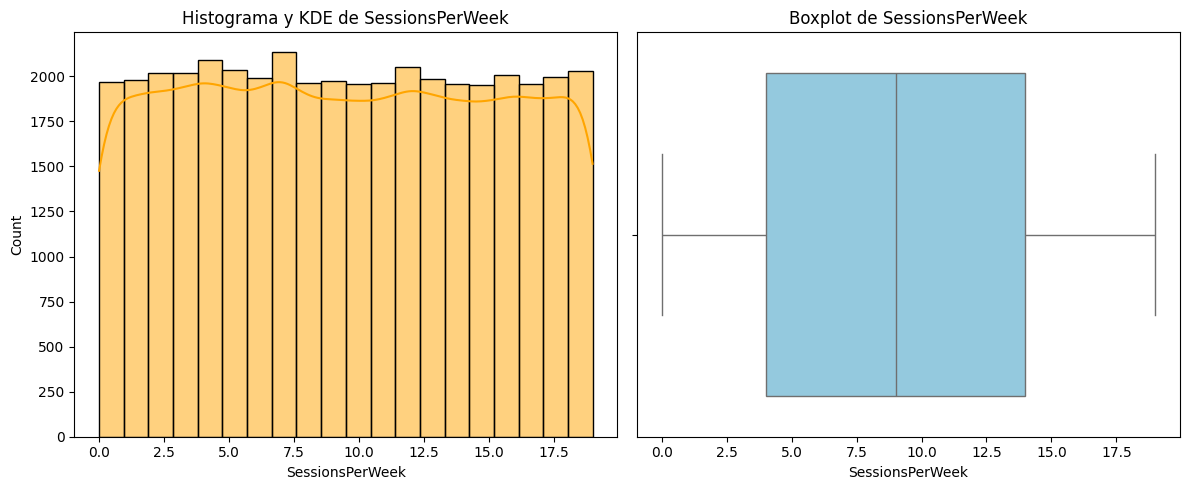

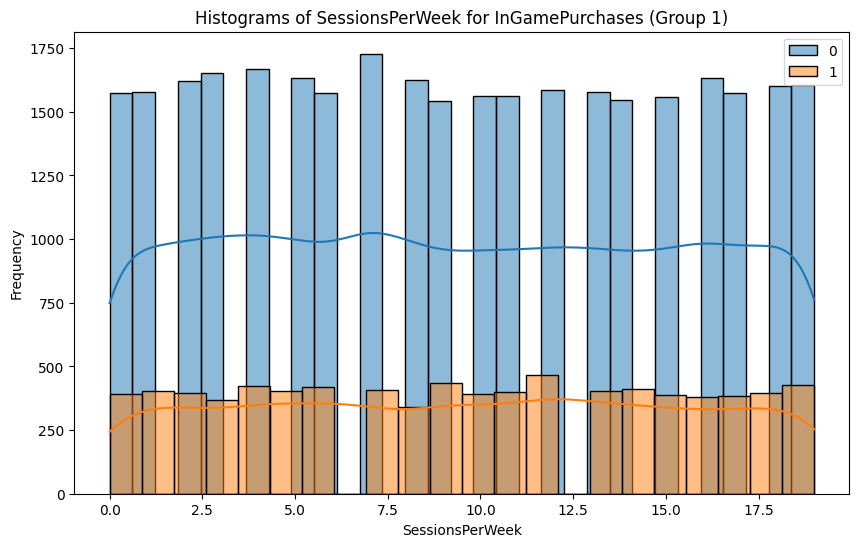

In [54]:
plot_combined_graphs(df_game_behaviour,["SessionsPerWeek"])
plot_grouped_histograms(df_game_behaviour, cat_col="InGamePurchases",num_col="SessionsPerWeek", group_size= 2)


In [55]:
grupos = df_game_behaviour['InGamePurchases'].unique() 
sessions = [df_game_behaviour[df_game_behaviour['InGamePurchases'] == grupo]['SessionsPerWeek'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*sessions) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1.0545707782431861
Valor p: 0.3044629439610615


#### Buscamos la relación entre compras y logros desbloqueados:

(2,)


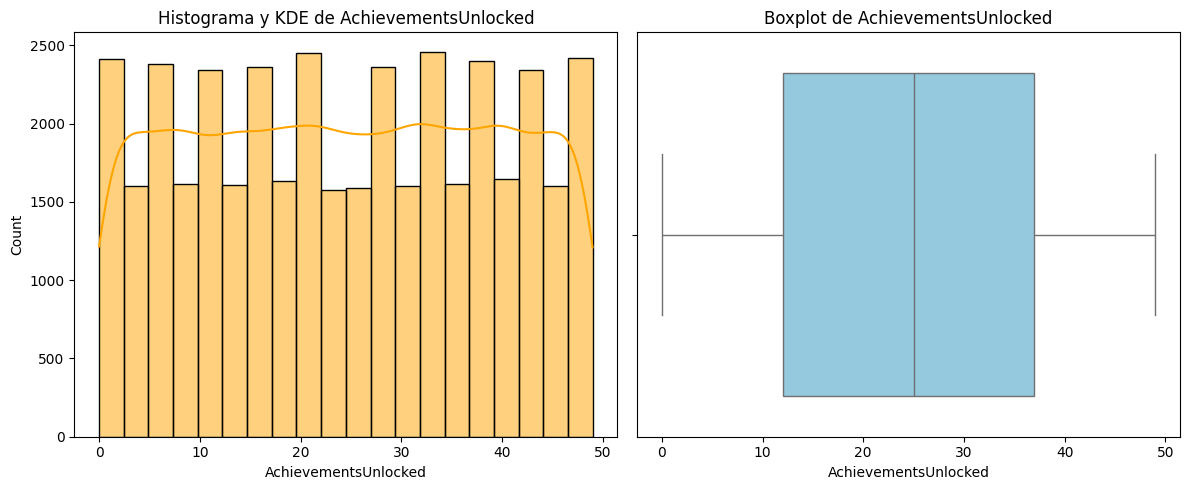

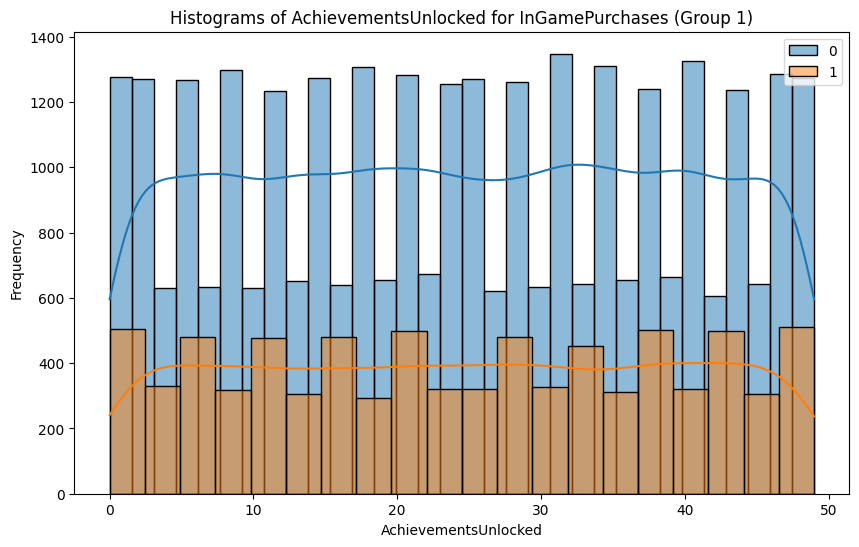

In [56]:
plot_combined_graphs(df_game_behaviour,["AchievementsUnlocked"])
plot_grouped_histograms(df_game_behaviour, cat_col="InGamePurchases",num_col="AchievementsUnlocked", group_size= 2)

In [57]:
grupos = df_game_behaviour['InGamePurchases'].unique() 
logros = [df_game_behaviour[df_game_behaviour['InGamePurchases'] == grupo]['AchievementsUnlocked'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*logros) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 0.0003814881443128732
Valor p: 0.9844170291683776


#### Buscamos la relación entre compras y horas de juego:

(2,)


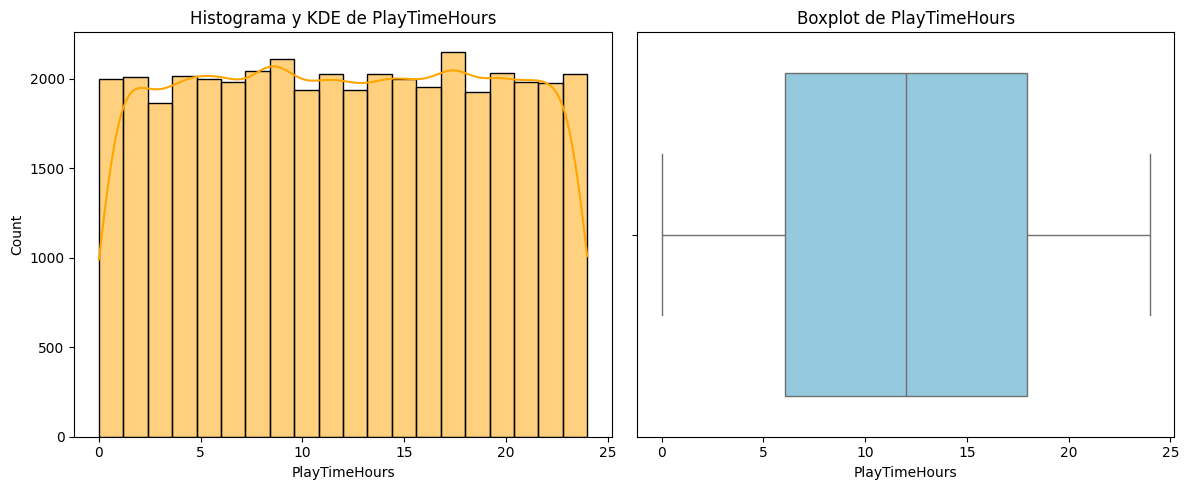

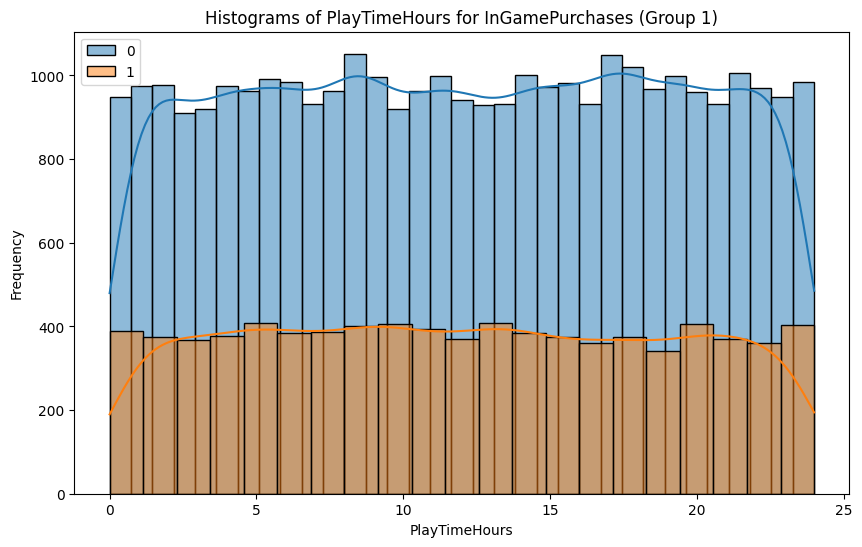

In [58]:
plot_combined_graphs(df_game_behaviour,["PlayTimeHours"])
plot_grouped_histograms(df_game_behaviour, cat_col="InGamePurchases",num_col="PlayTimeHours", group_size= 2)

In [59]:
grupos = df_game_behaviour['InGamePurchases'].unique() 
tiempo = [df_game_behaviour[df_game_behaviour['InGamePurchases'] == grupo]['PlayTimeHours'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*tiempo) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1.4733505386612102
Valor p: 0.2248249583481836


#### Buscamos la relación entre compras y nivel del jugador:

(2,)


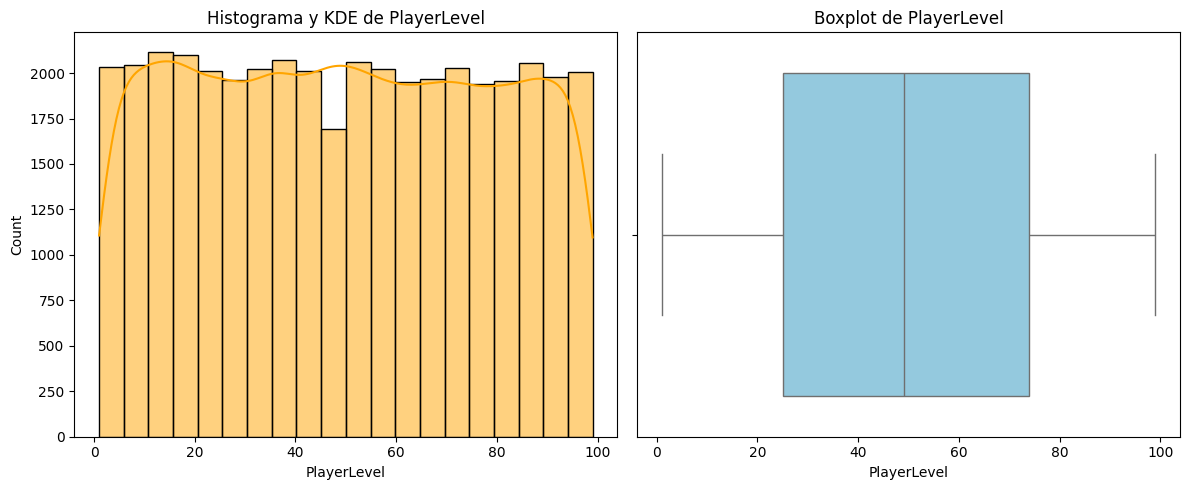

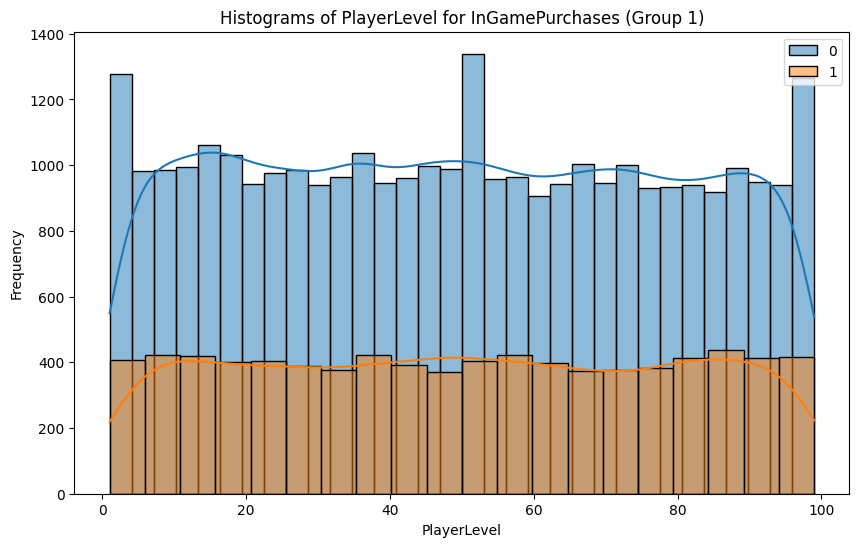

In [60]:
plot_combined_graphs(df_game_behaviour,["PlayerLevel"])
plot_grouped_histograms(df_game_behaviour, cat_col="InGamePurchases",num_col="PlayerLevel", group_size= 2)

In [61]:
grupos = df_game_behaviour['InGamePurchases'].unique() 
nivel = [df_game_behaviour[df_game_behaviour['InGamePurchases'] == grupo]['PlayerLevel'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*nivel) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1.7040944017603312
Valor p: 0.1917608903745341


#### H0: No existe relación entre las compras dentro del juego y el nivel de egagement de los jugadores.
Todos los resultado del test ANOVA han devuelto un valor p mayor que 0.05. Aparentemente no existe relacion entre el engagement de los jugadores y la decisión de compra. Tampoco existe evidencia de que el resto de variables influya positivamente.

### Análisis Bivariante: Engagement
Nos centramos en el análisis de las variables que son objeto de nuestra hipótesis y analizamos su relación.
- Engagement
- Tiempo de juego (sesiones por semana)
- Género de juego
- Adicionalmente, veremos otras varibales interesantes que pueden ayudar a conocer de forma superficial el perfil del jugador medio.

##### Engagement vs GameGenre

In [62]:
tabla_contingencia_engagement_gamegenre = pd.crosstab(df_game_behaviour["InGamePurchases"], df_game_behaviour["EngagementLevel"])
tabla_contingencia_engagement_gamegenre

EngagementLevel  High   Low  Medium
InGamePurchases                    
0                8202  8287   15504
1                2134  2037    3870

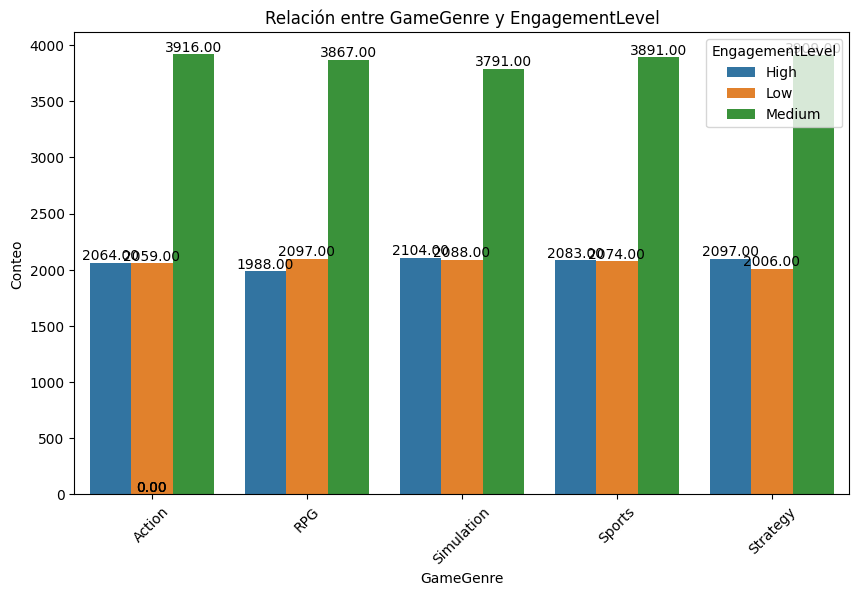

In [63]:
plot_categorical_relationship_fin(df_game_behaviour, "GameGenre", "EngagementLevel",  relative_freq=False, show_values=True, size_group = 5)

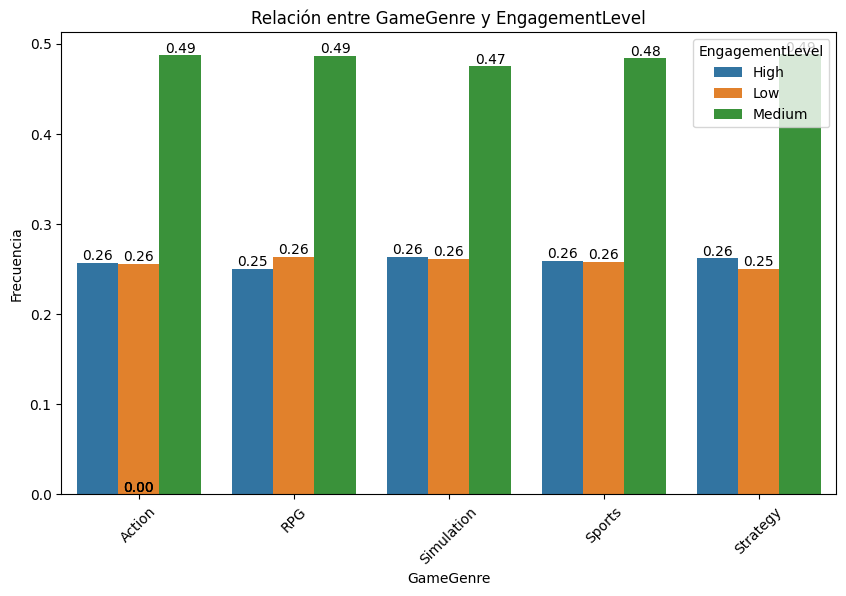

In [64]:
plot_categorical_relationship_fin(df_game_behaviour, "GameGenre", "EngagementLevel",  relative_freq=True, show_values=True, size_group = 5)

In [65]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_engagement_gamegenre)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 2.9813995085885474
P-Value: 0.2252150052205898
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 8259.97022531  8250.38047659 15482.6492981 ]
 [ 2076.02977469  2073.61952341  3891.3507019 ]]


##### Engagement vs SessionsPerWeek

In [66]:
eng_sessions = df_game_behaviour.groupby("EngagementLevel")["SessionsPerWeek"].describe()
eng_sessions

count       mean       std  min   25%   50%   75%   max
EngagementLevel                                                           
High             10336.0  14.254547  3.913398  0.0  12.0  15.0  17.0  19.0
Low              10324.0   4.530511  4.858866  0.0   1.0   3.0   7.0  19.0
Medium           19374.0   9.553267  4.761739  0.0   6.0   9.0  13.0  19.0

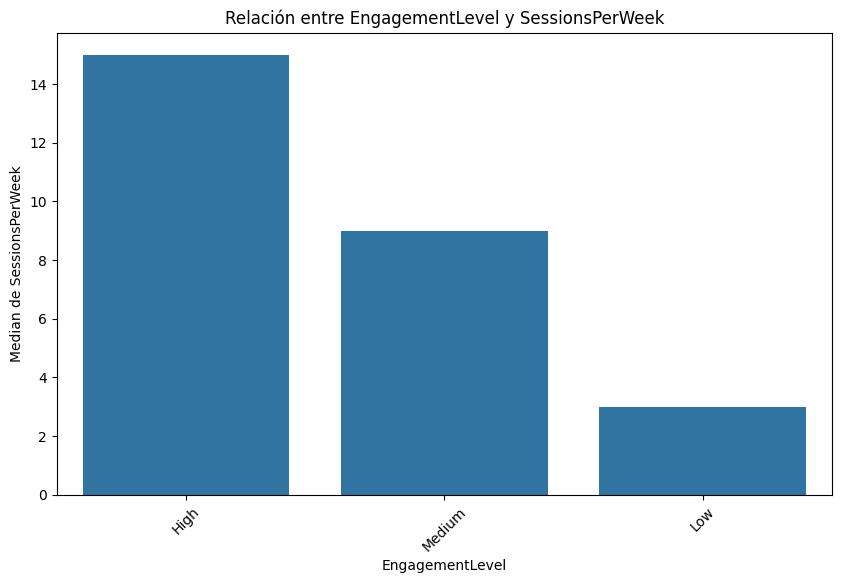

In [67]:
plot_categorical_numerical_relationship(df_game_behaviour, "EngagementLevel","SessionsPerWeek",measure="median") # Utilizando mediana

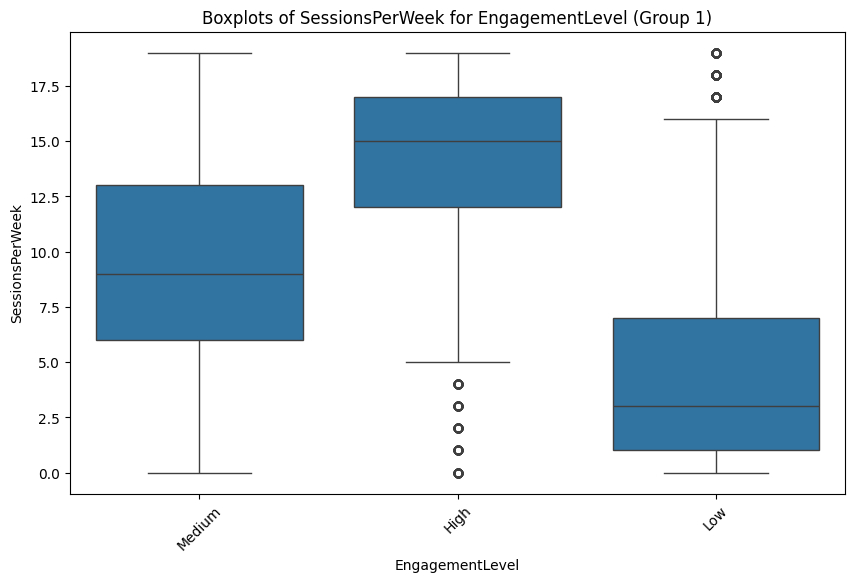

In [68]:
plot_grouped_boxplots(df_game_behaviour,"EngagementLevel","SessionsPerWeek")

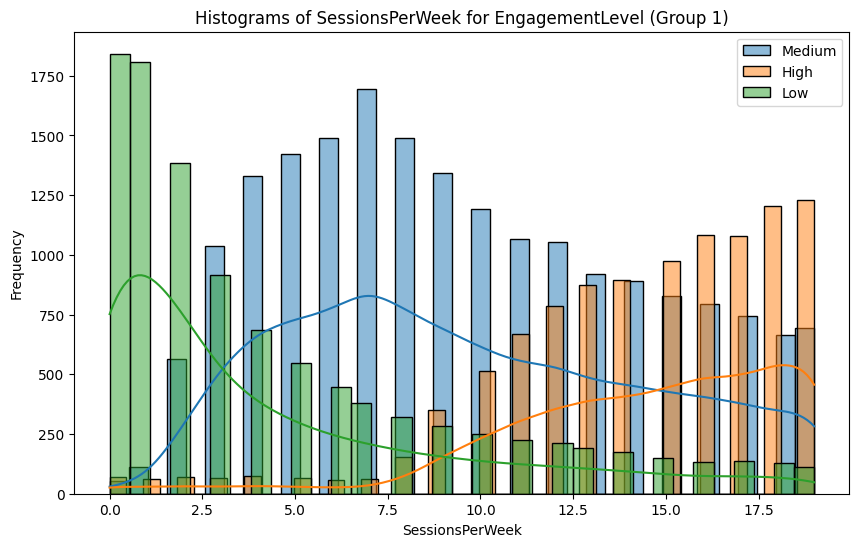

In [69]:
plot_grouped_histograms(df_game_behaviour,"EngagementLevel", "SessionsPerWeek", 3)

In [70]:
grupos = df_game_behaviour['EngagementLevel'].unique()  
SessionsperWeek = [df_game_behaviour[df_game_behaviour['EngagementLevel'] == grupo]['SessionsPerWeek'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*SessionsperWeek) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 11625.820362943938
Valor p: 0.0


##### H1: El nivel de engagement influye positivamente en el número de inicios de sesión a la semana. A mayor nivel de engagement, mayor frecuecia de inicios de sesión. 

Podemos tomar esto como una ventaja para aumentar las compras y generar planes de marketing específicos que se enfoquen en las recompensas por inicio de sesión, generar planes de fidelización, ofertas especiales, etc.

##### Engagement vs AchievementsUnlocked

In [71]:
eng_ach = df_game_behaviour.groupby("EngagementLevel")["AchievementsUnlocked"].describe()
eng_ach

count       mean        std  min   25%   50%   75%   max
EngagementLevel                                                            
High             10336.0  25.095975  14.418423  0.0  13.0  25.0  38.0  49.0
Low              10324.0  22.661565  14.191688  0.0  10.0  22.0  35.0  49.0
Medium           19374.0  25.216424  14.477567  0.0  13.0  26.0  38.0  49.0

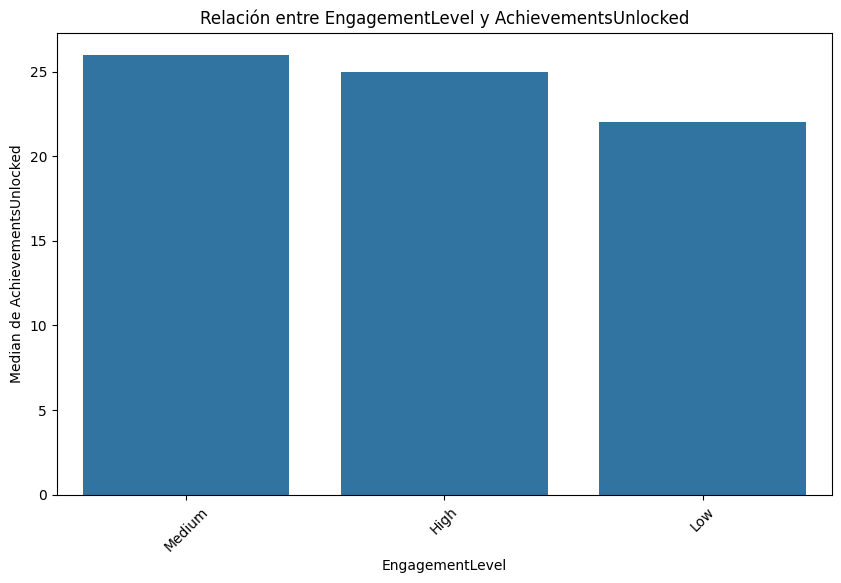

In [72]:
plot_categorical_numerical_relationship(df_game_behaviour, "EngagementLevel","AchievementsUnlocked",measure="median") # Utilizando mediana

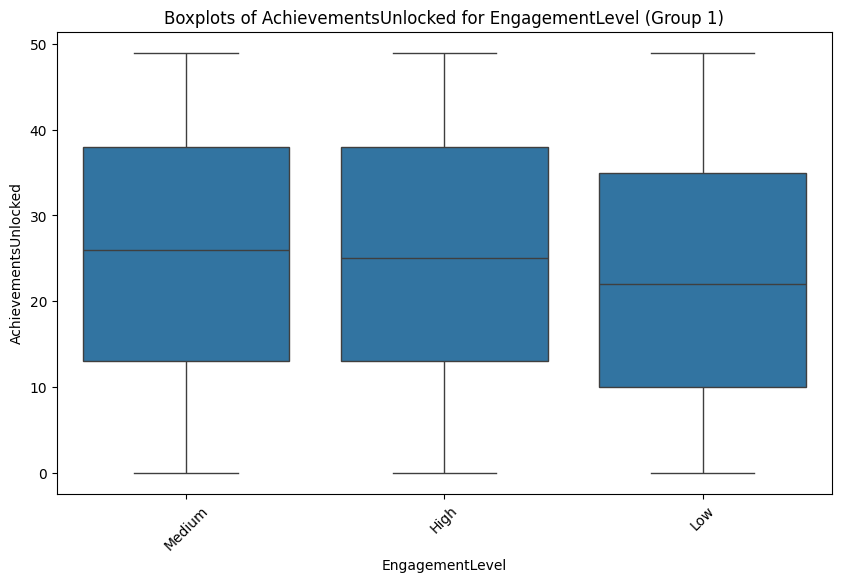

In [73]:
plot_grouped_boxplots(df_game_behaviour,"EngagementLevel","AchievementsUnlocked")

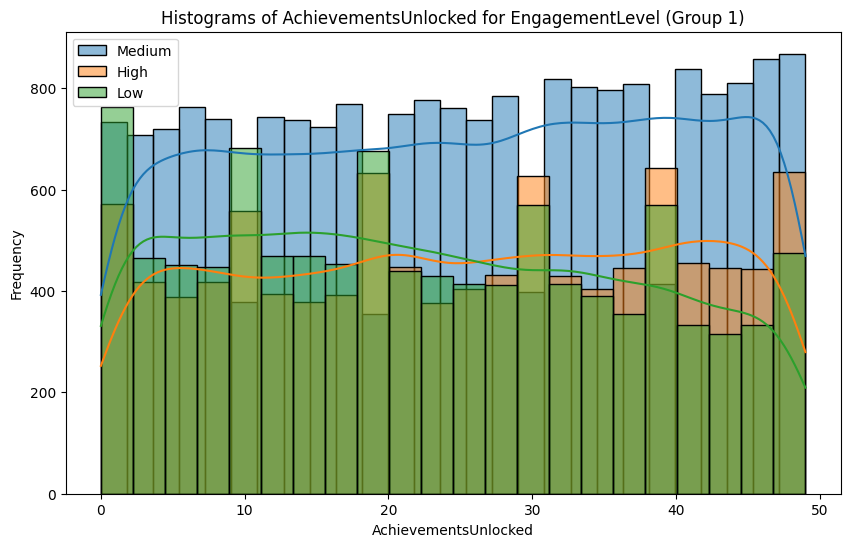

In [74]:
plot_grouped_histograms(df_game_behaviour,"EngagementLevel", "AchievementsUnlocked", 3)

In [75]:
grupos = df_game_behaviour['EngagementLevel'].unique()  
achievements= [df_game_behaviour[df_game_behaviour['EngagementLevel'] == grupo]['AchievementsUnlocked'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*achievements) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 117.07733777580692
Valor p: 2.0048810813344537e-51


##### Engagement vs PlayerLevel

In [76]:
eng_pl = df_game_behaviour.groupby("EngagementLevel")["PlayerLevel"].describe()
eng_pl

count       mean        std  min   25%   50%   75%   max
EngagementLevel                                                            
High             10336.0  50.823723  28.571585  1.0  26.0  51.0  76.0  99.0
Low              10324.0  46.101414  28.254155  1.0  21.0  44.0  70.0  99.0
Medium           19374.0  50.926293  28.617139  1.0  26.0  51.0  76.0  99.0

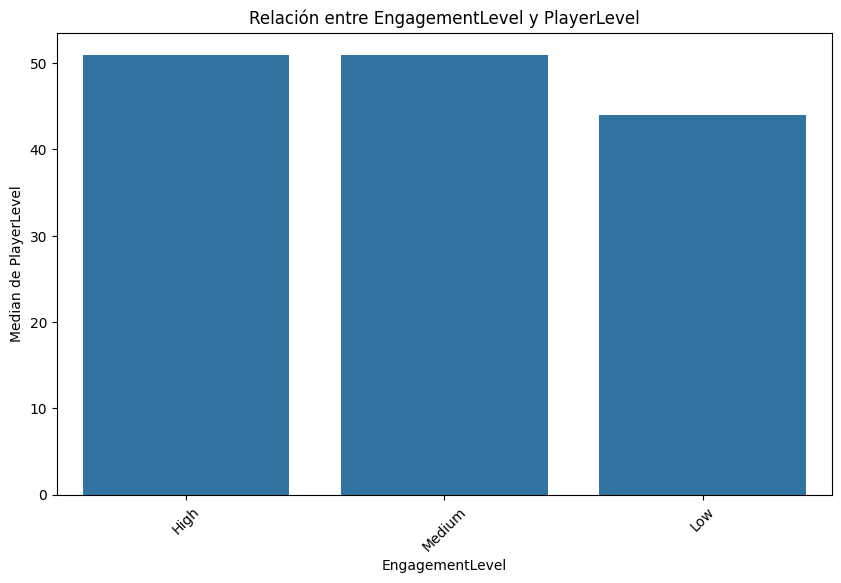

In [77]:
plot_categorical_numerical_relationship(df_game_behaviour, "EngagementLevel","PlayerLevel",measure="median") # Utilizando mediana

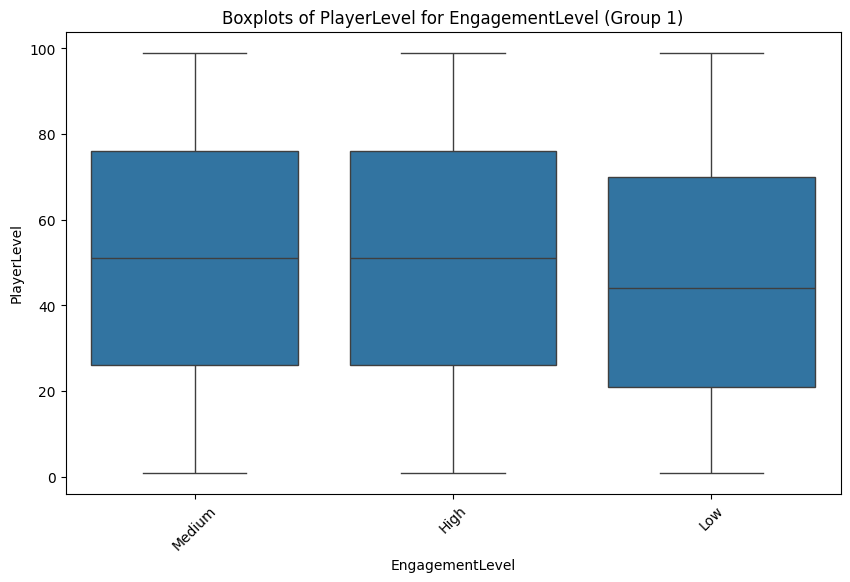

In [78]:
plot_grouped_boxplots(df_game_behaviour,"EngagementLevel","PlayerLevel")

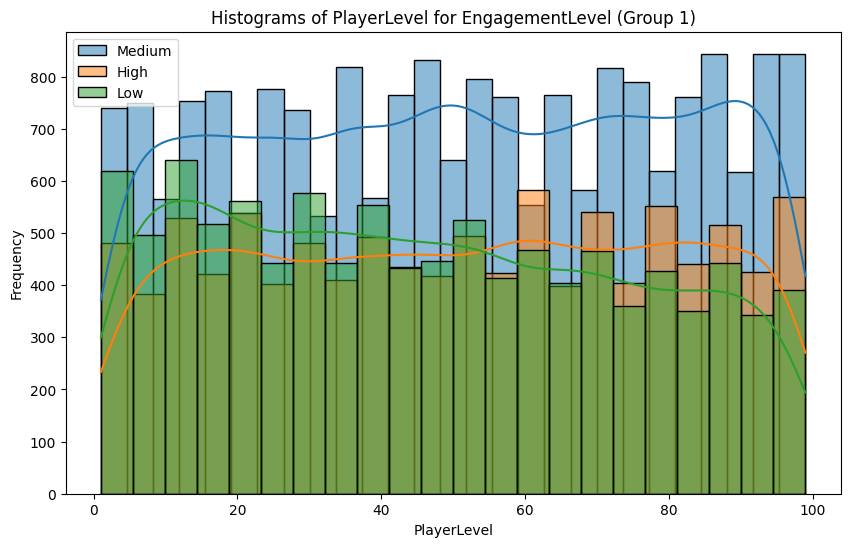

In [79]:
plot_grouped_histograms(df_game_behaviour,"EngagementLevel", "PlayerLevel", 3)

In [80]:
grupos = df_game_behaviour['EngagementLevel'].unique()  
pl= [df_game_behaviour[df_game_behaviour['EngagementLevel'] == grupo]['PlayerLevel'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*pl) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 108.12620510181841
Valor p: 1.4715293899458858e-47


##### Engagement vs Age

In [81]:
eng_age = df_game_behaviour.groupby("EngagementLevel")["Age"].describe()
eng_age

count       mean        std   min   25%   50%   75%   max
EngagementLevel                                                             
High             10336.0  31.920085  10.092480  15.0  23.0  32.0  41.0  49.0
Low              10324.0  31.896939  10.022122  15.0  23.0  32.0  41.0  49.0
Medium           19374.0  32.082120  10.027846  15.0  23.0  32.0  41.0  49.0

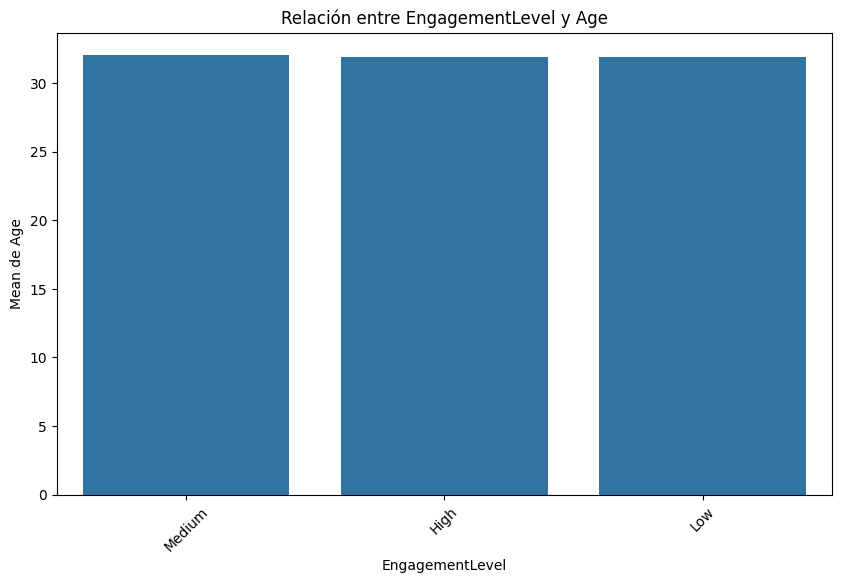

In [82]:
plot_categorical_numerical_relationship(df_game_behaviour, "EngagementLevel","Age",measure="mean") # Utilizando mediana

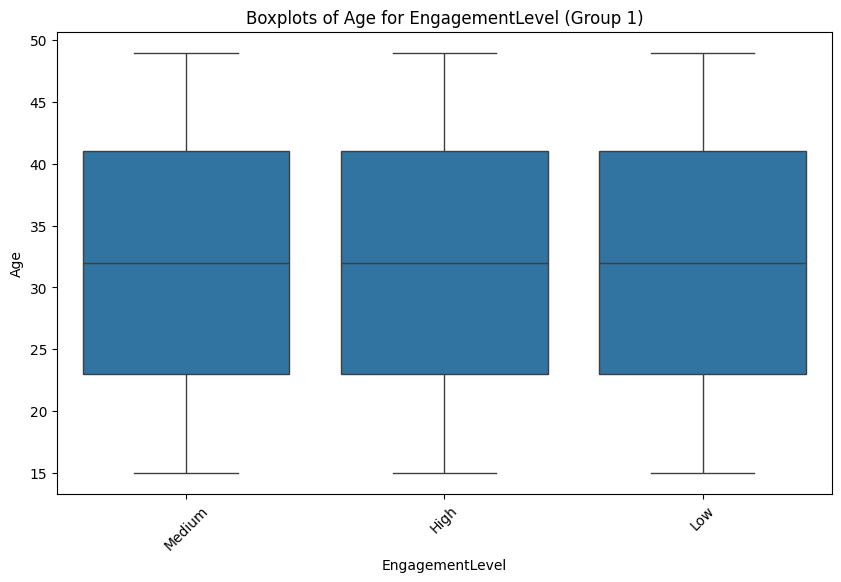

In [83]:
plot_grouped_boxplots(df_game_behaviour,"EngagementLevel","Age")

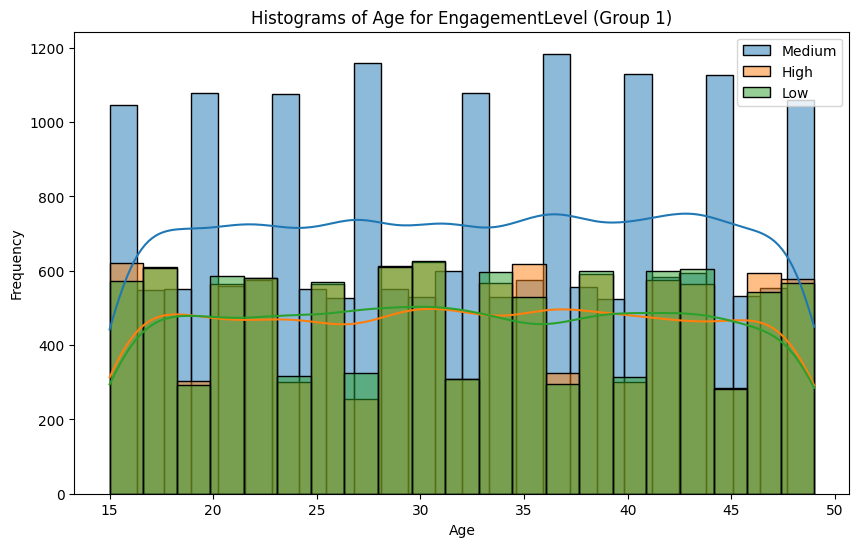

In [84]:
plot_grouped_histograms(df_game_behaviour,"EngagementLevel", "Age", 3)

In [85]:
grupos = df_game_behaviour['EngagementLevel'].unique()  
age= [df_game_behaviour[df_game_behaviour['EngagementLevel'] == grupo]['Age'] for grupo in grupos] 

f_val, p_val = stats.f_oneway(*age) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1.5074121325579348
Valor p: 0.22149497585816014


#### H0: Aparentemente, no existe relación siginificativa entre el engagement y el género de juego. 
#### H1: Parece que existe relación entre las sesiones iniciadas por semana y el engagement.

### Análisis Multivariante: Mapa de calor y Matriz de correlación

Recurrimos al mapa de calor para ver de forma general y directa la correlación que guardan las variables numéricas.

In [86]:
matriz_correlacion = df_game_behaviour[numericas].corr()
matriz_correlacion

Age  PlayTimeHours  SessionsPerWeek  \
Age                        1.000000       0.002462         0.008777   
PlayTimeHours              0.002462       1.000000        -0.003655   
SessionsPerWeek            0.008777      -0.003655         1.000000   
AvgSessionDurationMinutes -0.002269      -0.001925        -0.000620   
PlayerLevel                0.001353      -0.005152         0.003257   
AchievementsUnlocked      -0.001100       0.003913         0.003187   

                           AvgSessionDurationMinutes  PlayerLevel  \
Age                                        -0.002269     0.001353   
PlayTimeHours                              -0.001925    -0.005152   
SessionsPerWeek                            -0.000620     0.003257   
AvgSessionDurationMinutes                   1.000000     0.001368   
PlayerLevel                                 0.001368     1.000000   
AchievementsUnlocked                       -0.002227     0.006343   

                           AchievementsUnlocked  
Age                                   -0.001100  
PlayTimeHours                          0.003913  
SessionsPerWeek                        0.003187  
AvgSessionDurationMinutes             -0.002227  
PlayerLevel                            0.006343  
AchievementsUnlocked                   1.000000

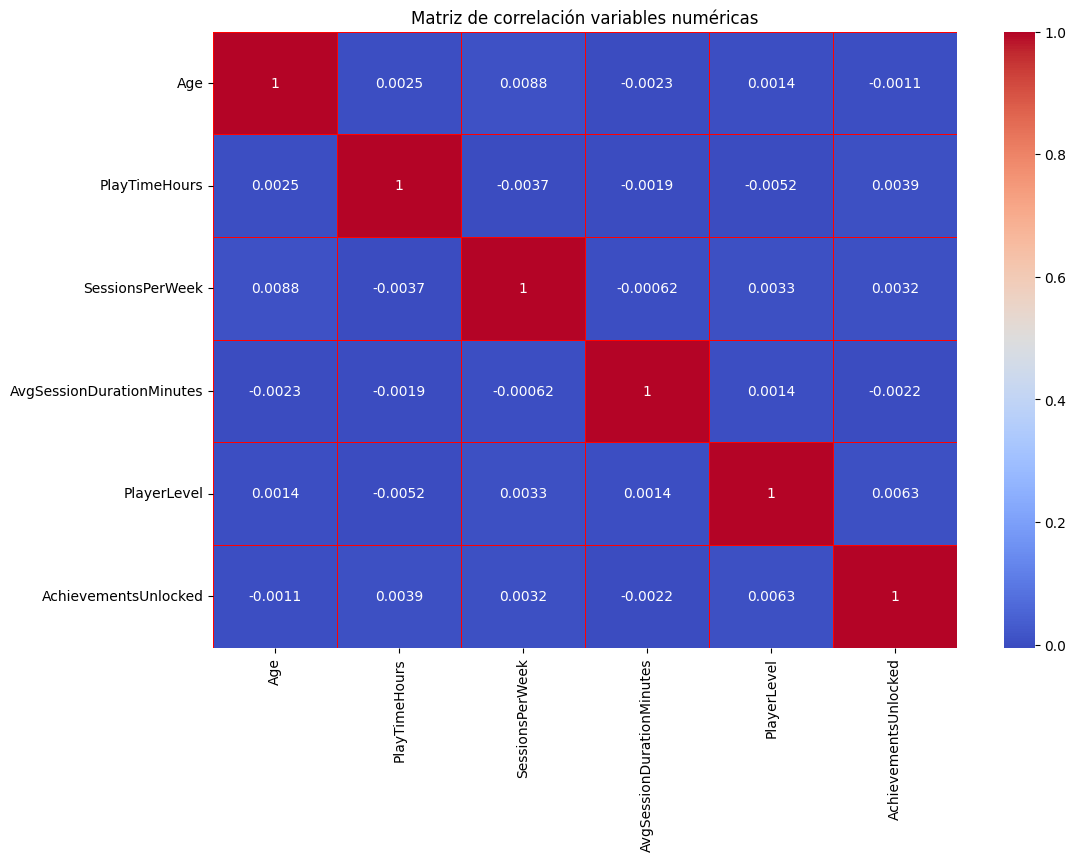

In [87]:
plt.figure(figsize=(12,8))

sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", linewidths=0.5, linecolor="red")
plt.title("Matriz de correlación variables numéricas")

plt.show()

#### Observaciones:
 - Los valores de correlación están muy alejados de -1 y 1 lo que dificulta poder relacionarlas entre sí. 
 - Dado el caso, vamos a ver el comportamiento en las variables edad y sesiones de juego por semana, ya que pueden arrojar más información para resolver nuestras preguntas.

### Analisis adicionales:


#### Relación entre edad e inicios de sesiones por semana:

(2,)


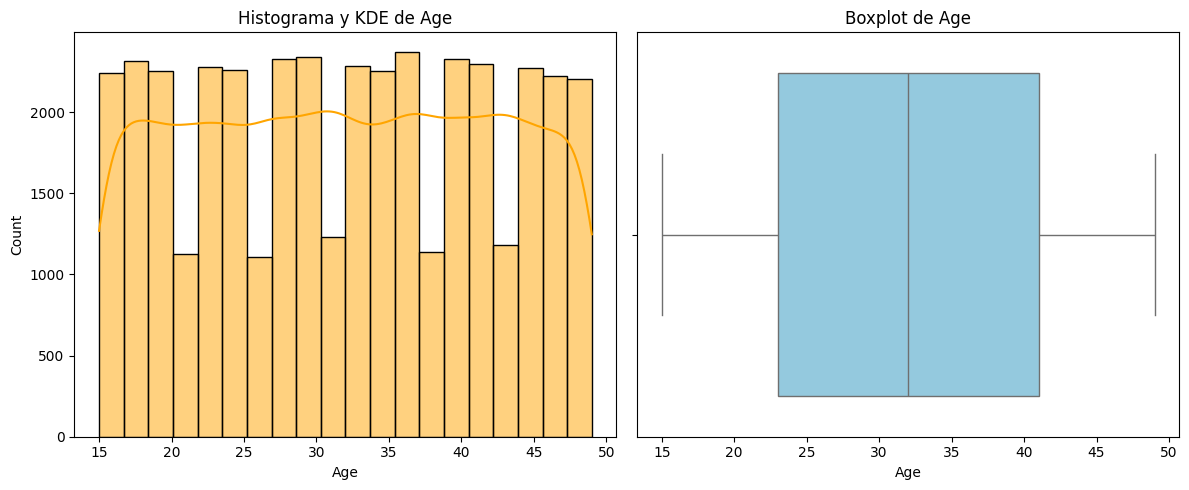

(2,)


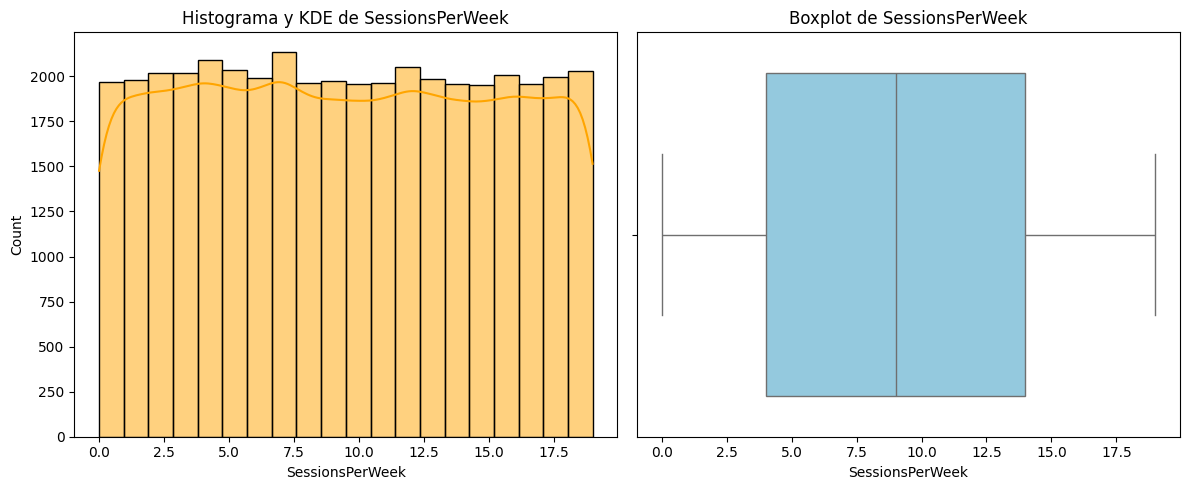

In [88]:
plot_combined_graphs(df_game_behaviour,["Age"])
plot_combined_graphs(df_game_behaviour,["SessionsPerWeek"])

In [89]:
df_game_behaviour[["Age","SessionsPerWeek"]].describe()

Age  SessionsPerWeek
count  40034.000000     40034.000000
mean      31.992531         9.471774
std       10.043227         5.763667
min       15.000000         0.000000
25%       23.000000         4.000000
50%       32.000000         9.000000
75%       41.000000        14.000000
max       49.000000        19.000000

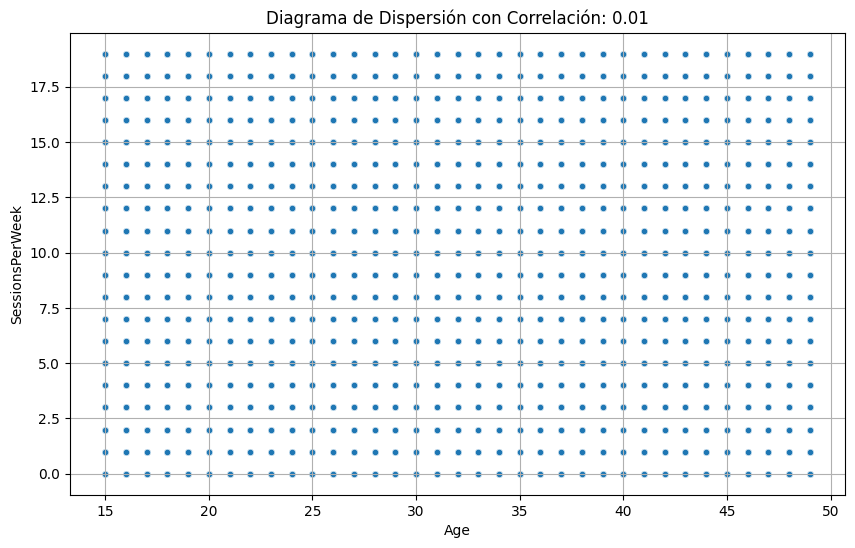

In [90]:
grafico_dispersion_con_correlacion(df_game_behaviour,"Age", "SessionsPerWeek", 20, mostrar_correlacion=True)

Observaciones:
- Aquí se podría abrir un nuevo camino de estudio y segmentar por grupos de edad, ya que se observan grupos pequeños en algunos intervalos. 
- Como hemos visto de forma general al inicio del estudio, un usuario medio de 32 años, realiza un media de 9,5 sesiones a la semana.
- No se puede apreciar interacción entre las variables en la gráfica dada la homogeneidad de los datos.

#### Analizamos la relación entre nivel del jugador y logros desbloqueados:

(2, 2)


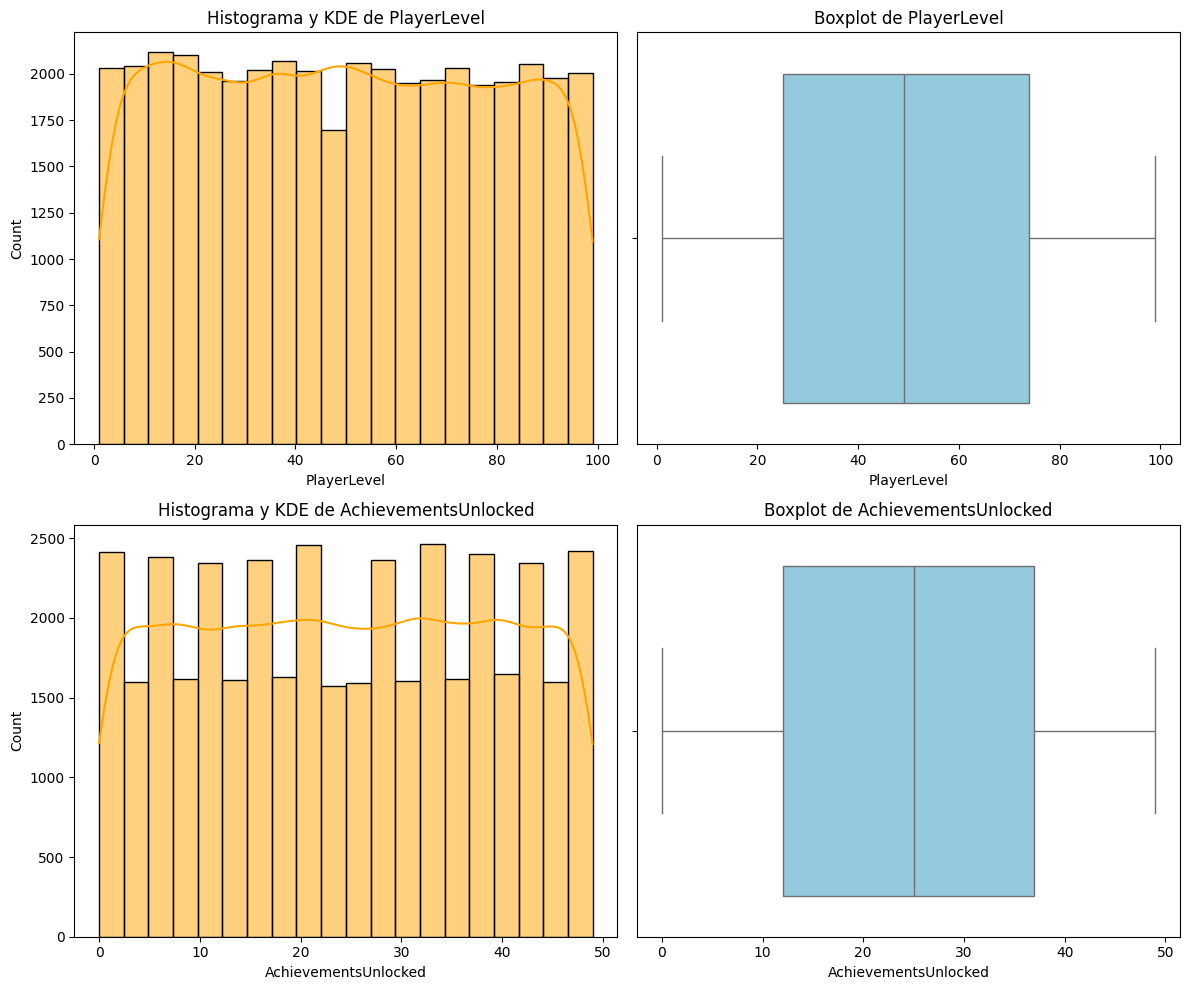

In [91]:
plot_combined_graphs(df_game_behaviour,["PlayerLevel", "AchievementsUnlocked"])

In [92]:
pl_achU = df_game_behaviour.groupby("AchievementsUnlocked")["PlayerLevel"].describe()
pl_achU

count       mean        std  min    25%   50%    75%  \
AchievementsUnlocked                                                         
0                     810.0  49.304938  28.867107  1.0  24.00  49.0  73.00   
1                     807.0  50.581165  29.203666  1.0  25.00  50.0  76.00   
2                     798.0  48.901003  28.881734  1.0  22.00  50.0  73.00   
3                     823.0  49.021871  28.899516  1.0  24.00  48.0  73.00   
4                     777.0  50.810811  28.227609  1.0  27.00  50.0  76.00   
5                     788.0  48.428934  28.399604  1.0  25.00  48.0  72.25   
6                     798.0  48.739348  28.451940  1.0  23.00  47.0  74.00   
7                     794.0  49.994962  28.034027  1.0  26.00  50.0  73.75   
8                     840.0  49.609524  28.249736  1.0  25.00  50.0  73.00   
9                     775.0  49.256774  28.648270  1.0  25.00  49.0  74.00   
10                    800.0  49.641250  28.578067  1.0  24.00  49.0  75.00   
11                    750.0  50.108000  28.018739  1.0  27.00  49.0  72.00   
12                    793.0  50.306431  29.605839  1.0  23.00  52.0  78.00   
13                    800.0  50.291250  28.399156  1.0  25.00  52.0  75.00   
14                    809.0  47.619283  28.793923  1.0  22.00  48.0  73.00   
15                    790.0  49.413924  27.912539  1.0  26.00  50.0  71.75   
16                    793.0  49.983607  28.182235  1.0  25.00  50.0  74.00   
17                    780.0  49.796154  28.885338  1.0  25.00  48.0  75.00   
18                    842.0  49.277910  29.394746  1.0  24.00  49.0  76.00   
19                    790.0  49.946835  28.266336  1.0  27.00  49.0  75.00   
20                    806.0  50.352357  29.192612  1.0  26.00  50.0  76.00   
21                    825.0  51.271515  28.923887  1.0  26.00  53.0  76.00   
22                    824.0  50.025485  28.798678  1.0  25.00  50.0  74.00   
23                    805.0  48.542857  28.379881  1.0  25.00  46.0  73.00   
24                    771.0  47.479896  27.934023  1.0  23.00  46.0  72.00   
25                    797.0  49.659975  28.480198  1.0  25.00  49.0  74.00   
26                    793.0  46.940731  28.953119  1.0  22.00  44.0  72.00   
27                    774.0  47.563307  28.958113  1.0  22.00  44.0  73.00   
28                    789.0  50.015209  28.665448  1.0  24.00  50.0  75.00   
29                    799.0  50.444305  27.828630  1.0  29.00  49.0  74.00   
30                    797.0  49.391468  28.083505  1.0  25.00  49.0  73.00   
31                    807.0  50.640644  28.417042  1.0  26.00  51.0  75.00   
32                    870.0  49.108046  28.472421  1.0  24.00  49.0  73.00   
33                    793.0  50.994956  28.832545  1.0  26.00  51.0  78.00   
34                    798.0  49.000000  28.839668  1.0  23.00  50.0  73.00   
35                    796.0  49.295226  28.785776  1.0  23.00  49.5  74.00   
36                    821.0  50.060901  29.557611  1.0  24.00  51.0  77.00   
37                    788.0  51.323604  28.840632  1.0  26.00  54.0  76.00   
38                    774.0  49.285530  28.923906  1.0  25.00  49.0  74.00   
39                    842.0  50.001188  28.245884  1.0  26.00  50.0  74.75   
40                    837.0  49.502987  28.884758  1.0  23.00  49.0  74.00   
41                    811.0  49.774353  28.196220  1.0  24.00  52.0  74.00   
42                    762.0  50.477690  27.955477  1.0  27.00  51.0  73.00   
43                    790.0  49.088608  28.518328  1.0  25.00  48.0  74.00   
44                    790.0  50.436709  28.676826  1.0  25.25  51.0  75.00   
45                    805.0  49.686957  28.356015  1.0  26.00  49.0  75.00   
46                    794.0  50.031486  28.102726  1.0  25.00  51.0  73.00   
47                    809.0  52.168109  28.398489  1.0  26.00  53.0  77.00   
48                    837.0  49.862605  28.212904  1.0  25.00  49.0  74.00   
49                    773.0  49.222510  28.8

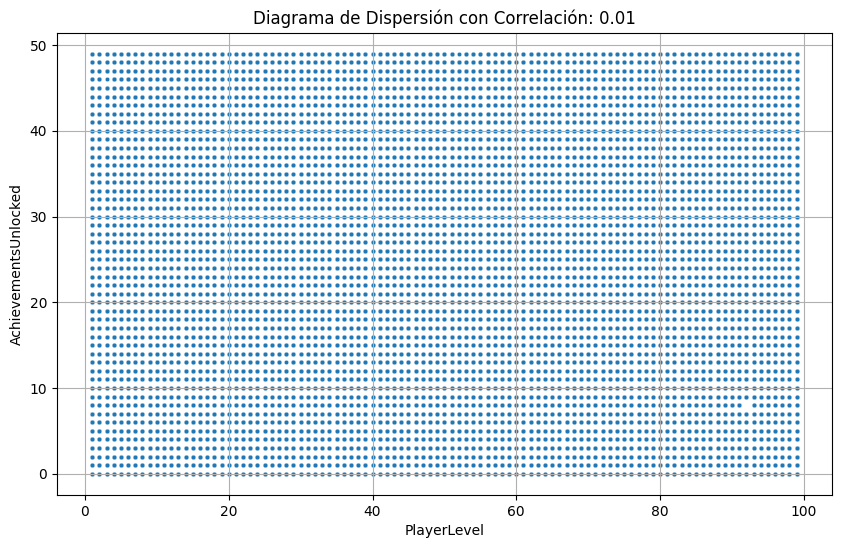

In [93]:
grafico_dispersion_con_correlacion(df_game_behaviour,"PlayerLevel", "AchievementsUnlocked", tamano_puntos= 10, mostrar_correlacion=True)

#### Género de juego y logros

In [94]:
pl_achU = df_game_behaviour.groupby("GameGenre")["AchievementsUnlocked"].describe()
pl_achU

count       mean        std  min   25%   50%   75%   max
GameGenre                                                            
Action      8039.0  24.582784  14.365422  0.0  12.0  25.0  37.0  49.0
RPG         7952.0  24.518234  14.497032  0.0  12.0  25.0  37.0  49.0
Simulation  7983.0  24.554052  14.347280  0.0  12.0  24.0  37.0  49.0
Sports      8048.0  24.397242  14.508273  0.0  12.0  24.0  37.0  49.0
Strategy    8012.0  24.580504  14.437720  0.0  12.0  25.0  37.0  49.0

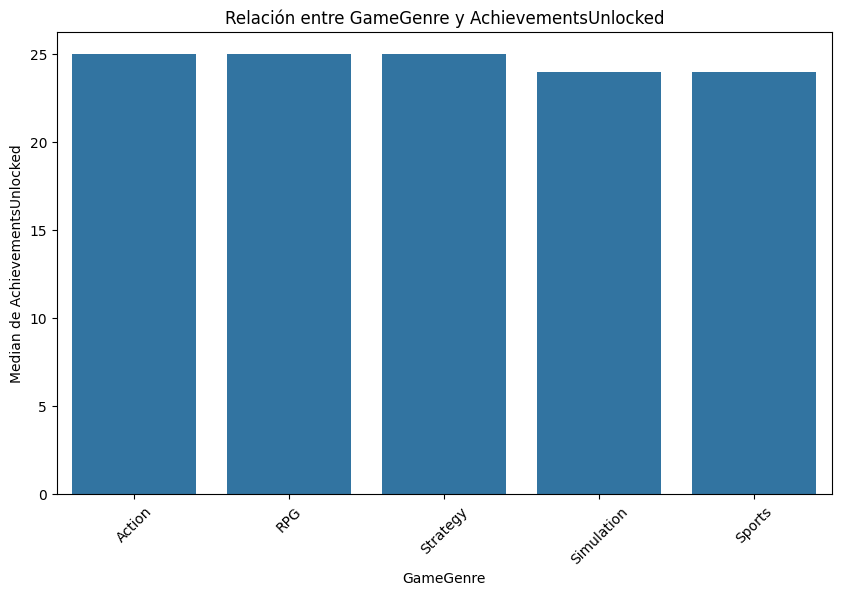

In [95]:
plot_categorical_numerical_relationship(df_game_behaviour,"GameGenre","AchievementsUnlocked", measure = "median")

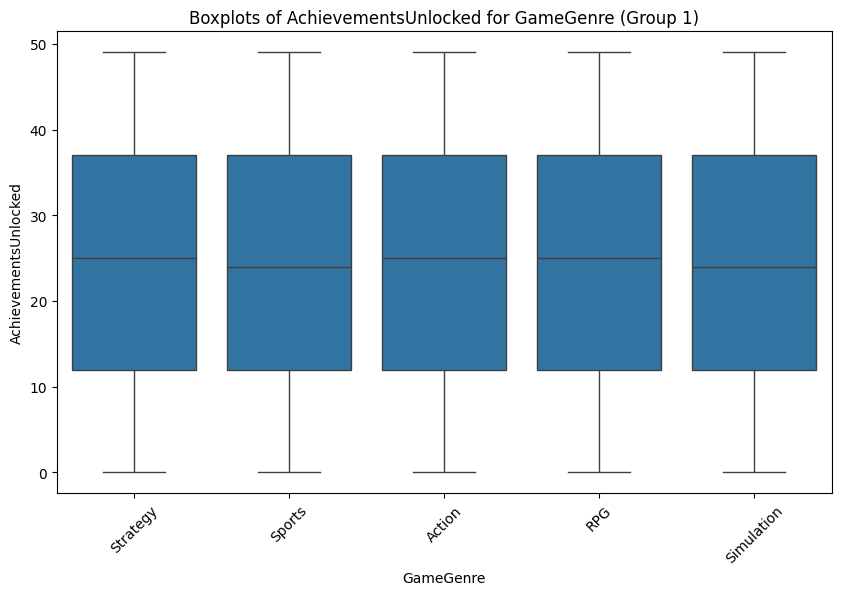

In [96]:
plot_grouped_boxplots(df_game_behaviour,"GameGenre","AchievementsUnlocked")

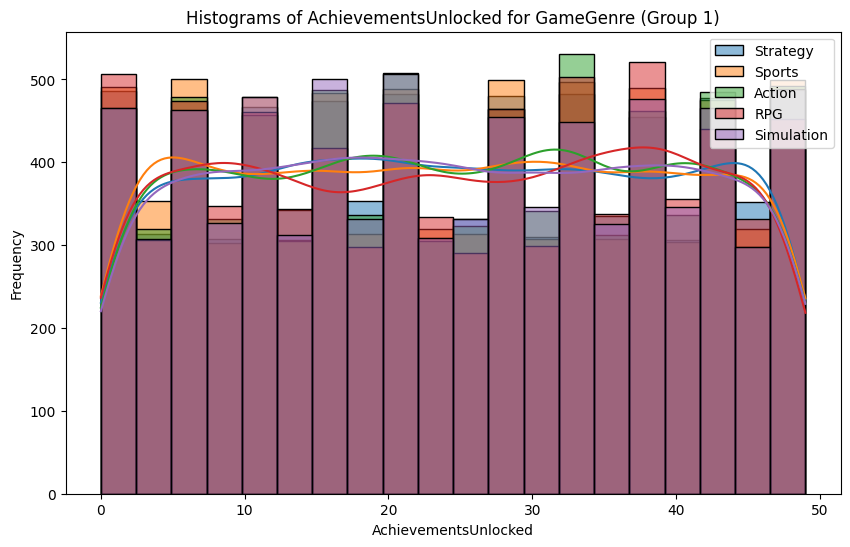

In [97]:
plot_grouped_histograms(df_game_behaviour,"GameGenre", "AchievementsUnlocked", 5)

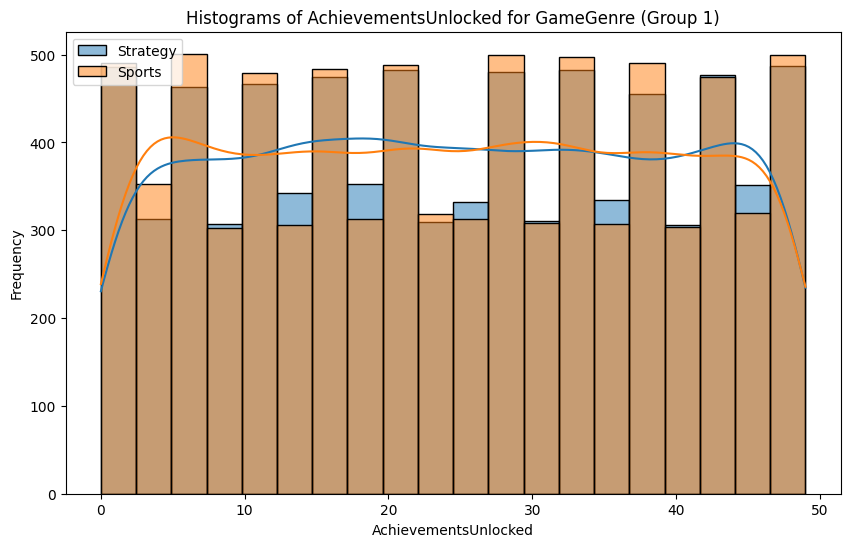

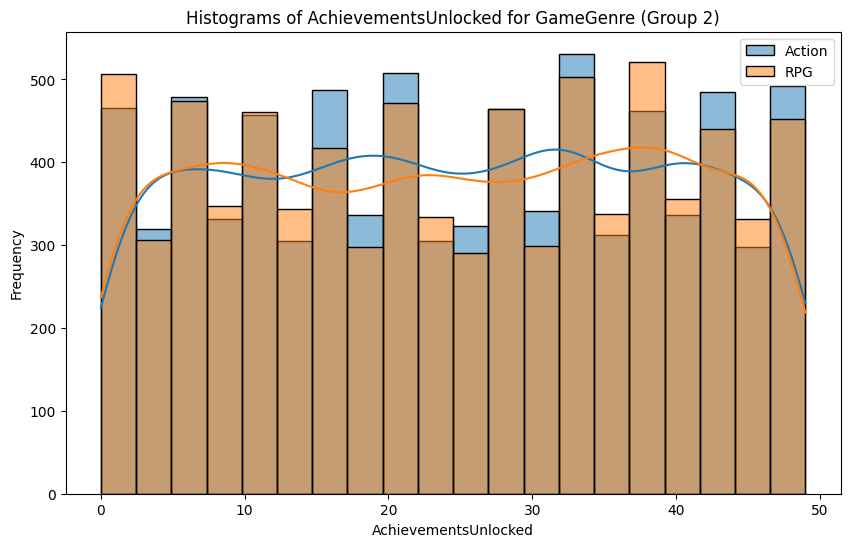

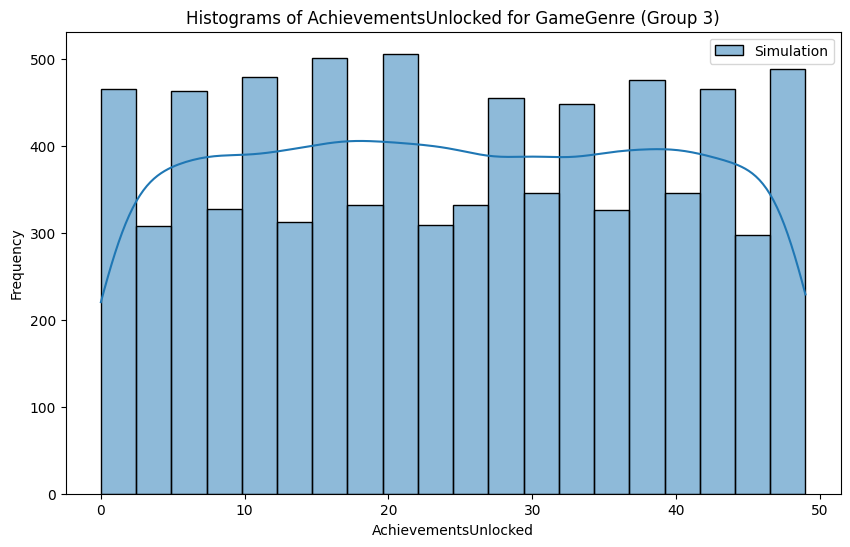

In [98]:
plot_grouped_histograms(df_game_behaviour,"GameGenre", "AchievementsUnlocked", 2)

#### Genero de juegos y sesiones a la semana

In [99]:
gen_sess = df_game_behaviour.groupby("GameGenre")["SessionsPerWeek"].describe()
gen_sess

count      mean       std  min  25%   50%   75%   max
GameGenre                                                         
Action      8039.0  9.472820  5.782960  0.0  4.0   9.0  14.0  19.0
RPG         7952.0  9.405810  5.727377  0.0  5.0   9.0  14.0  19.0
Simulation  7983.0  9.440436  5.810046  0.0  4.0   9.0  14.0  19.0
Sports      8048.0  9.497391  5.746044  0.0  4.0  10.0  14.0  19.0
Strategy    8012.0  9.541687  5.751947  0.0  5.0   9.0  15.0  19.0

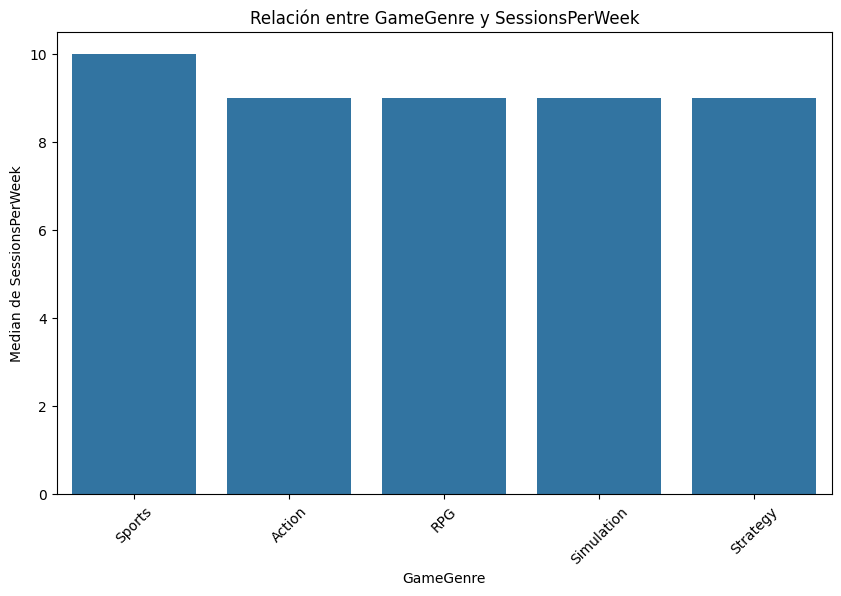

In [100]:
plot_categorical_numerical_relationship(df_game_behaviour,"GameGenre","SessionsPerWeek", measure = "median")

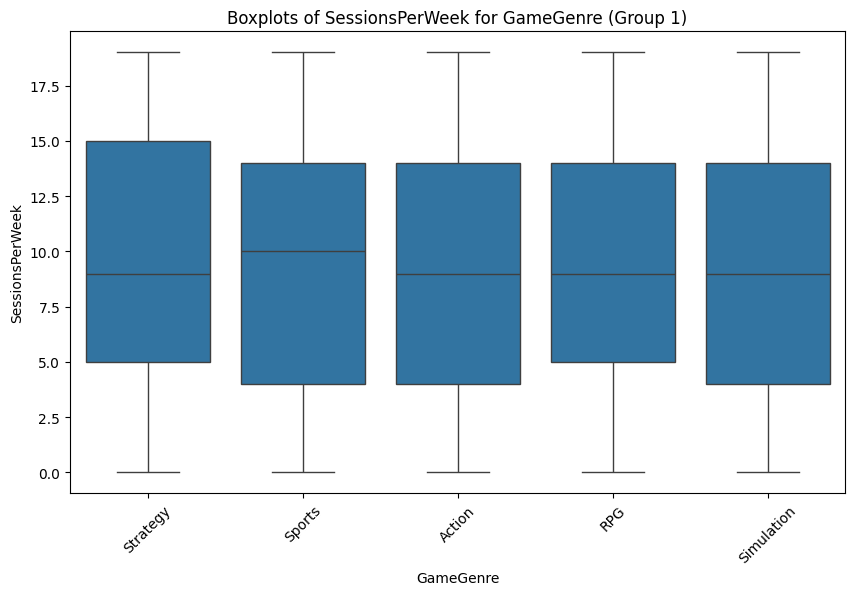

In [101]:
plot_grouped_boxplots(df_game_behaviour,"GameGenre","SessionsPerWeek")

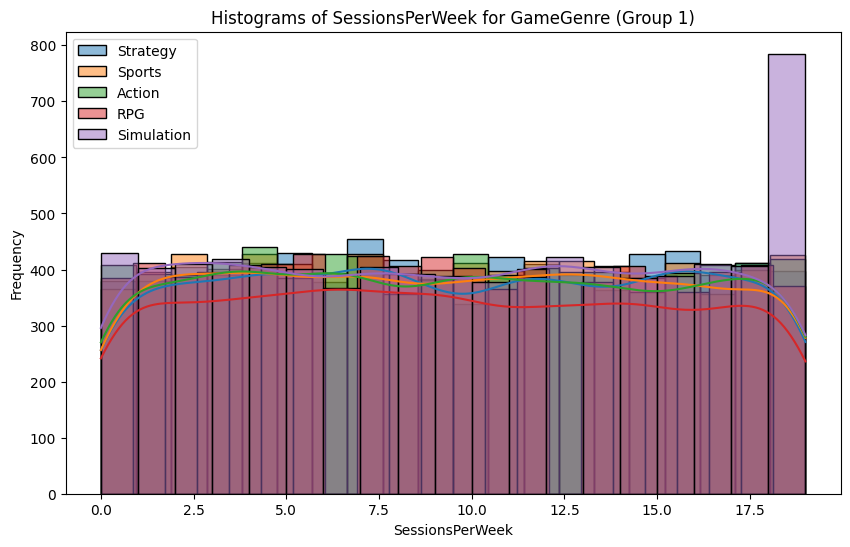

In [102]:
plot_grouped_histograms(df_game_behaviour,"GameGenre", "SessionsPerWeek", 5)

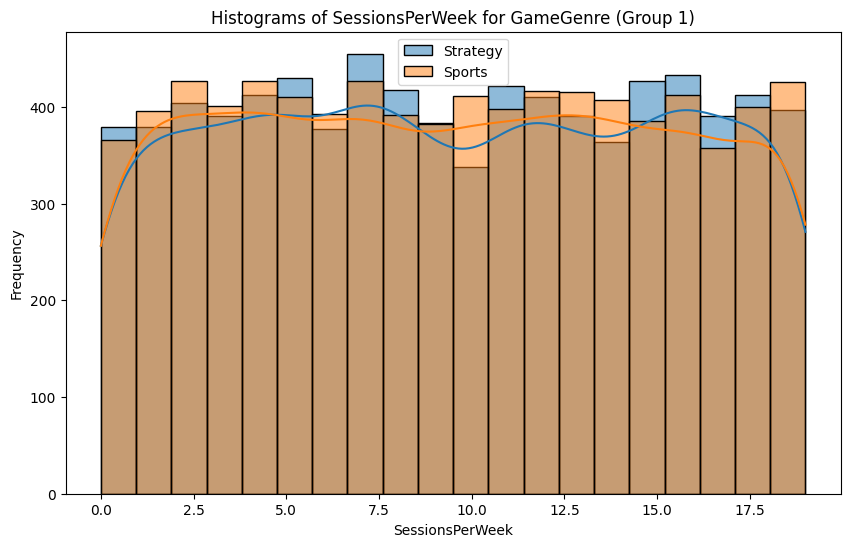

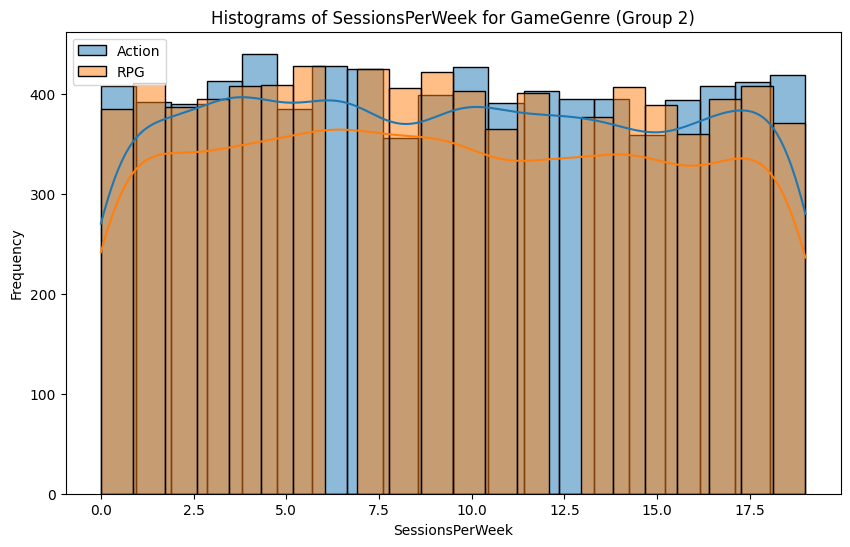

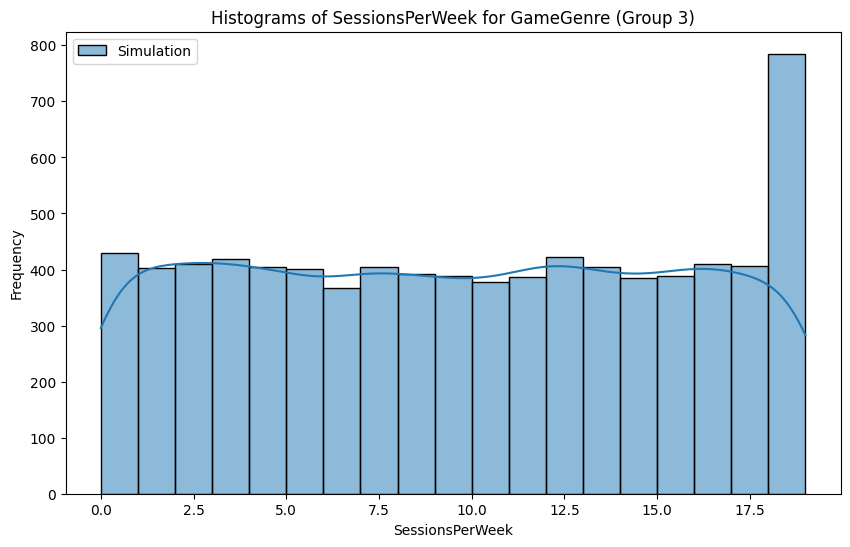

In [103]:
plot_grouped_histograms(df_game_behaviour,"GameGenre", "SessionsPerWeek", 2)

Como punto interesante observado, destaca que existe un grupo de personas que cumplen con el valor máximo de inicios de sesión a la semana. 

### Agrupaciones:

Con el objetivo de responder de una forma algo más precisa a nuestras preguntas iniciales, vamos a centrarnos en el mercado Europeo y segmentar por un rango de edad en el que se encuentre la edad media del jugador. 

In [104]:
df_game_behaviour_copy = df_game_behaviour.copy()
df_game_behaviour_copy.drop("PlayerID", axis=1)
df_game_behaviour_copy["InGamePurchases"] = df_game_behaviour_copy["InGamePurchases"].replace({0:"No", 1:"Yes"})
df_game_behaviour_copy

PlayerID  Age  Gender Location   GameGenre  PlayTimeHours  \
0          9000   43    Male    Other    Strategy      16.271119   
1          9001   29  Female      USA    Strategy       5.525961   
2          9002   22  Female      USA      Sports       8.223755   
3          9003   35    Male      USA      Action       5.265351   
4          9004   33    Male   Europe      Action      15.531945   
...         ...  ...     ...      ...         ...            ...   
40029     49029   32    Male      USA    Strategy      20.619662   
40030     49030   44  Female    Other  Simulation      13.539280   
40031     49031   15  Female      USA         RPG       0.240057   
40032     49032   34    Male      USA      Sports      14.017818   
40033     49033   19    Male      USA      Sports      10.083804   

      InGamePurchases GameDifficulty  SessionsPerWeek  \
0                  No         Medium                6   
1                  No         Medium                5   
2                  No           Easy               16   
3                 Yes           Easy                9   
4                  No         Medium                2   
...               ...            ...              ...   
40029              No           Easy                4   
40030              No           Hard               19   
40031             Yes           Easy               10   
40032             Yes         Medium                3   
40033              No           Easy               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                            108           79                    25   
1                            144           11                    10   
2                            142           35                    41   
3                             85           57                    47   
4                            131           95                    37   
...                          ...          ...                   ...   
40029                         75           85                    14   
40030                        114           71                    27   
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

      EngagementLevel  
0              Medium  
1              Medium  
2                High  
3              Medium  
4              Medium  
...               ...  
40029          Medium  
40030            High  
40031            High  
40032          Medium  
40033          Medium  

[40034 rows x 13 columns]

#### Segmentamos por región: Europa

In [105]:
#Filtrar el dataframe
localizacion_target = "Europe"

df_europe = df_game_behaviour_copy[df_game_behaviour_copy["Location"] == localizacion_target]


#### Visualizar el porcentaje global de compras

In [118]:
compras_europa = df_europe["InGamePurchases"].value_counts()
print(f"Compras en Europa: {compras_europa}")

porcentaje_compras_eu = (compras_europa / compras_europa.sum())*100
print(f"Porcentaje de compras en Europa: {porcentaje_compras_eu}")

Compras en Europa: InGamePurchases
No     9561
Yes    2443
Name: count, dtype: int64
Porcentaje de compras en Europa: InGamePurchases
No     79.648451
Yes    20.351549
Name: count, dtype: float64


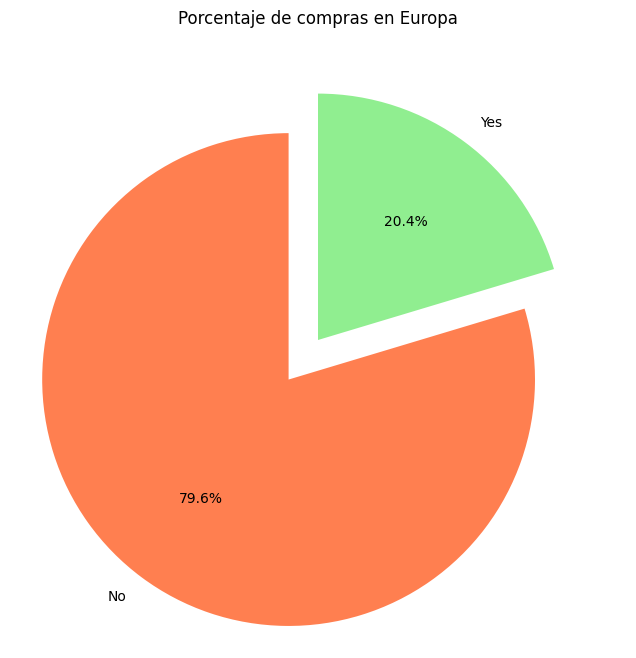

In [121]:
#PiePlot:
plt.figure(figsize=(8,8))
plt.pie(porcentaje_compras_eu, explode=(0.2, 0), labels=porcentaje_compras_eu.index, autopct= '%1.1f%%', startangle= 90, colors=["coral", "lightgreen"])

plt.title("Porcentaje de compras en Europa")
plt.show()

#### Vamos a analizar qué genero de juego tiene mayor número de inicios de sesión a la semana según el engagement

In [107]:
sesiones_genero = df_europe.groupby(["EngagementLevel","GameGenre"])["SessionsPerWeek"].mean().reset_index()
sesiones_genero.sort_values(by="SessionsPerWeek", ascending=False)

EngagementLevel   GameGenre  SessionsPerWeek
4             High    Strategy        14.433110
1             High         RPG        14.366883
2             High  Simulation        14.293245
3             High      Sports        14.222222
0             High      Action        14.107029
12          Medium  Simulation         9.736934
11          Medium         RPG         9.709364
14          Medium    Strategy         9.564192
10          Medium      Action         9.521592
13          Medium      Sports         9.514743
9              Low    Strategy         4.879870
8              Low      Sports         4.723917
7              Low  Simulation         4.708649
5              Low      Action         4.494364
6              Low         RPG         4.016026

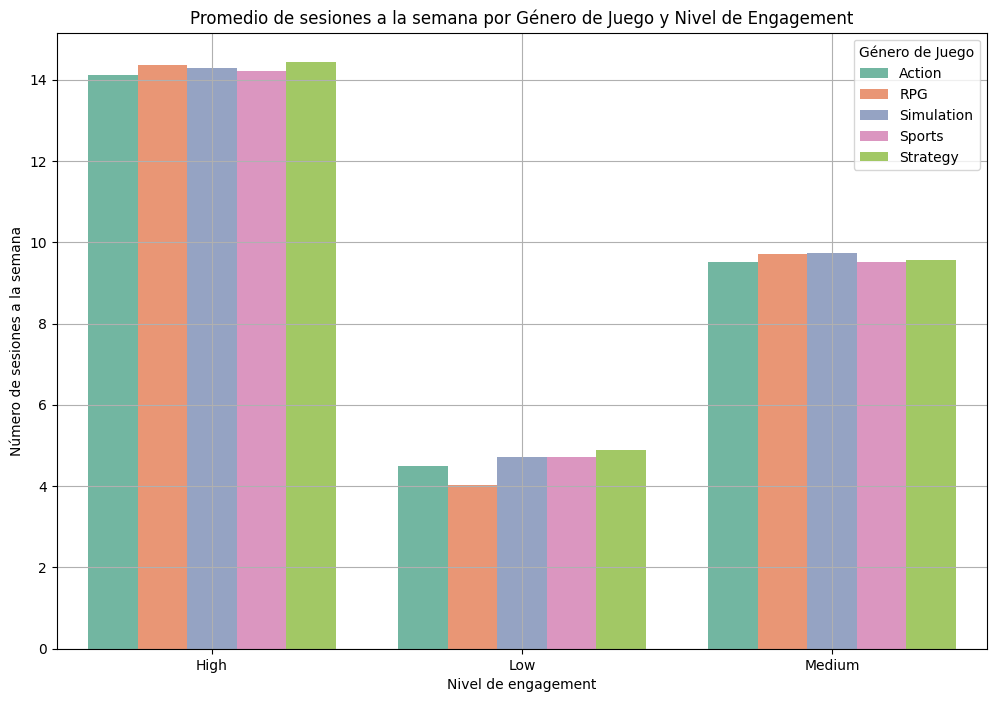

In [108]:
plt.figure(figsize= (12, 8))


sns.barplot(x="EngagementLevel", y="SessionsPerWeek", hue="GameGenre", data=sesiones_genero, palette="Set2")
plt.title("Promedio de sesiones a la semana por Género de Juego y Nivel de Engagement")
plt.xlabel("Nivel de engagement")
plt.ylabel("Número de sesiones a la semana")
plt.legend(title= "Género de Juego")
plt.grid(True)
plt.show()

#### Sesiones semanales totales por género según el engagement:

In [109]:
sesiones_totales_genero_eng = df_europe.groupby(["GameGenre", "EngagementLevel"])["SessionsPerWeek"].sum().sort_values(ascending=False).reset_index()
sesiones_totales_genero_eng

GameGenre EngagementLevel  SessionsPerWeek
0       Sports          Medium            11294
1       Action          Medium            11245
2   Simulation          Medium            11178
3          RPG          Medium            10991
4     Strategy          Medium            10951
5          RPG            High             8850
6       Sports            High             8832
7       Action            High             8831
8   Simulation            High             8676
9     Strategy            High             8631
10  Simulation             Low             3103
11    Strategy             Low             3006
12      Sports             Low             2943
13      Action             Low             2791
14         RPG             Low             2506

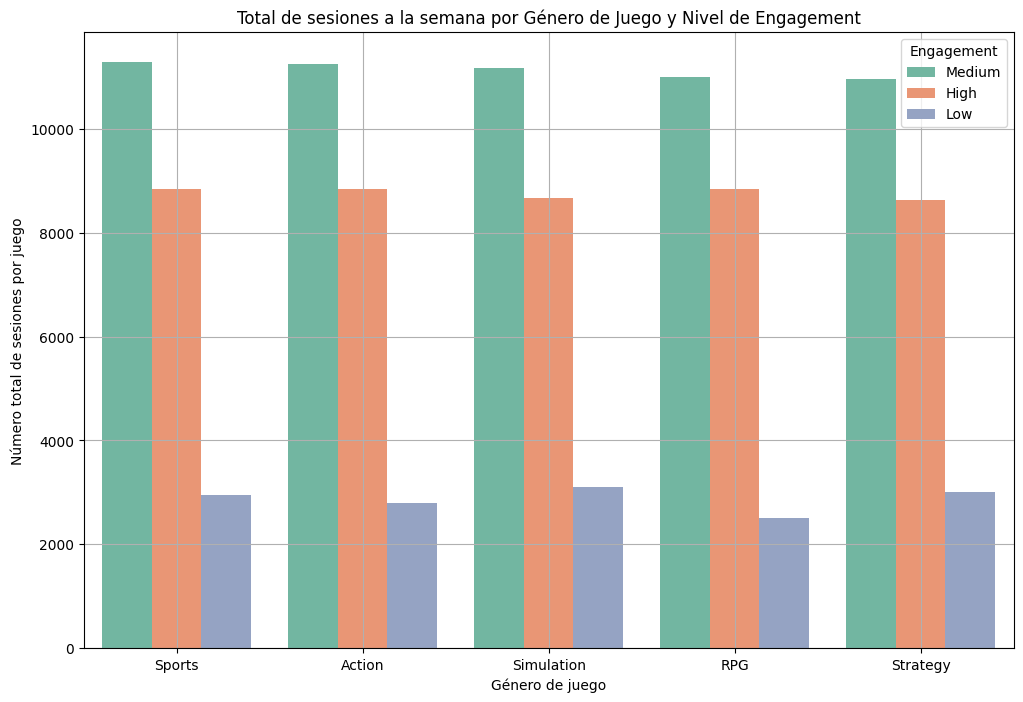

In [110]:
plt.figure(figsize= (12, 8))


sns.barplot(x="GameGenre", y="SessionsPerWeek", hue="EngagementLevel", data=sesiones_totales_genero_eng, palette="Set2")
plt.title("Total de sesiones a la semana por Género de Juego y Nivel de Engagement")
plt.xlabel("Género de juego")
plt.ylabel("Número total de sesiones por juego")
plt.legend(title= "Engagement")
plt.grid(True)
plt.show()

#### Vamos a ver el porcentaje de la edad media de los jugadores y qué genero de juego es el más popular en esa media:

In [111]:
filtro_edad_media = df_europe["Age"].mean()
print(f"La edad media del jugador en Europa es {round(filtro_edad_media)} años")


La edad media del jugador en Europa es 32 años


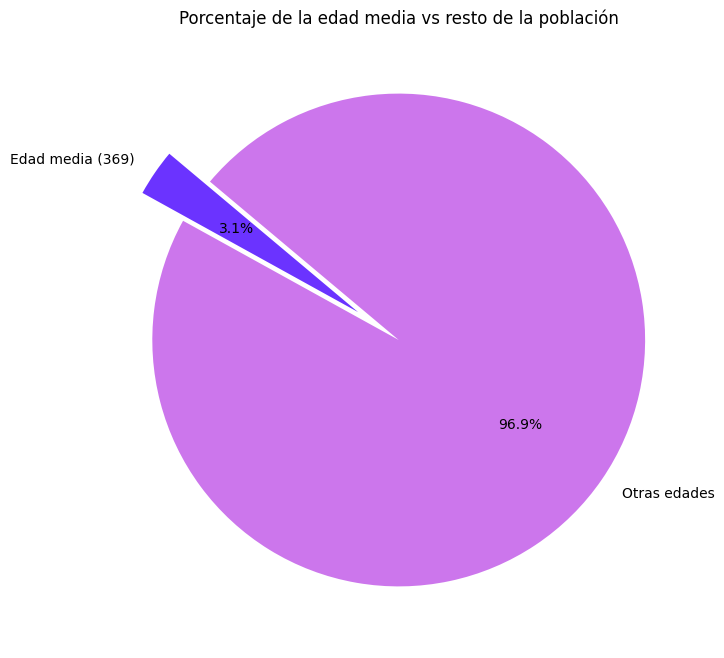

In [112]:
#Calcular que porcentaje de la población representa la edad media:
filtro_edad_media = round(filtro_edad_media)
total_edad_media = df_europe[df_europe["Age"] == filtro_edad_media].shape[0]
total_otros = df_europe.shape[0] - total_edad_media

total_pob = df_europe.shape[0]
porcentaje_edad_media = (total_edad_media / total_pob) *100
porcentaje_otros = (total_otros / total_pob) *100

#Pieplot:
labels = [f"Edad media ({total_edad_media})", "Otras edades"]
sizes = [porcentaje_edad_media, porcentaje_otros]
colors = ["#6b33ff","#cc76ec"]
explode = (0.2, 0)

plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=False, startangle=140)

plt.title("Porcentaje de la edad media vs resto de la población")
plt.show()



#### Vamos segmentar la edad en un rango de 25 a 35 años, teniendo en cuenta que la media de edad se encuentra en los 32 años. Buscamos realizar un análisis que arroje datos más significativos.

In [113]:
rango_edad_1 = df_europe[(df_europe["Age"] >= 25) & (df_europe["Age"] <= 35)] #Cogemos un segmento de edad en el que se encuentre la media

porcentaje_rango1 = len(rango_edad_1)/ len(df_europe) * 100
print(f"El porcentaje de jugadores para el rango de edad (25-30) es de {round(porcentaje_rango1)} %")

El porcentaje de jugadores para el rango de edad (25-30) es de 32 %


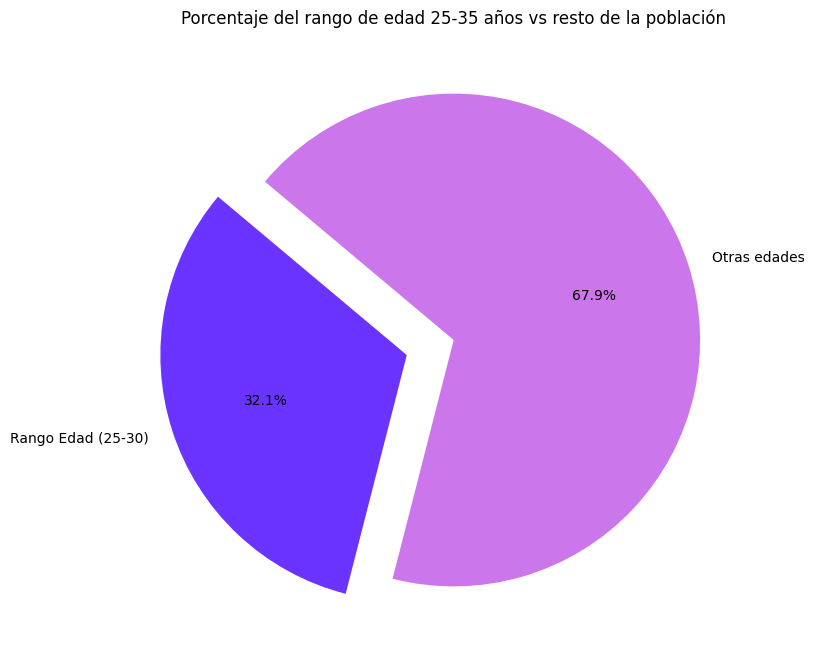

In [114]:
#Calcular que porcentaje de la población representa el rango de edad seleccionado:
total_rango = rango_edad_1.shape[0]
total_otros1 = df_europe.shape[0] - total_rango

total_pob = df_europe.shape[0]
porcentaje_rango2 = (total_rango / total_pob) * 100
porcentaje_otros = (total_otros1 / total_pob) *100

#Pieplot:
labels = [f"Rango Edad (25-30)", "Otras edades"]
sizes = [porcentaje_rango1, porcentaje_otros]
colors = ["#6b33ff","#cc76ec"]
explode = (0.2, 0)

plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%.1f%%', shadow=False, startangle=140)

plt.title("Porcentaje del rango de edad 25-35 años vs resto de la población")
plt.show()

 #### Ahora vamos ver qué juego es el más popular dentro de este rango de edad:

In [115]:
popularidad_genero_edad = rango_edad_1["GameGenre"].mode()[0]
print(f"El genero más popular entre la edad media de jugadores es: {popularidad_genero_edad}")

El genero más popular entre la edad media de jugadores es: Action


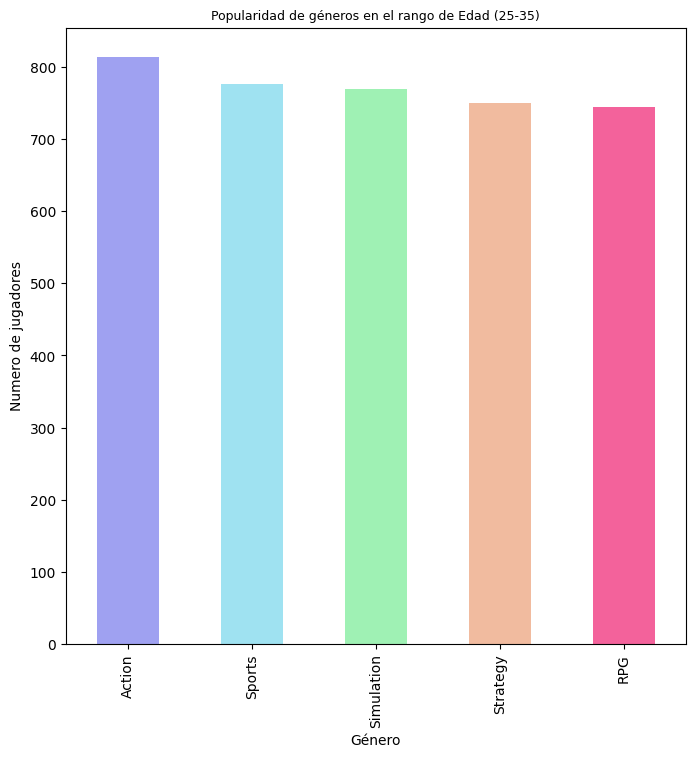

In [116]:
#Vemos qué genero es el más popular en el rango de edad media:
generos = rango_edad_1["GameGenre"].value_counts()

plt.figure(figsize=(8,8))
generos.plot(kind="bar", color=["#767aec", "#76d6ec", "#76ec94", "#ec9f76", "#ef1f71"], alpha= 0.7)

plt.title("Popularidad de géneros en el rango de Edad (25-35)", fontsize= 9)
plt.xlabel("Género")
plt.ylabel("Numero de jugadores");

#### Al ampliar el rango de edad, el género de deportes pasa a ocupar el segundo lugar en popularidad, pero por una diferencia casi inapreciable.

#### Vemos el nivel de engagement para el juego más popular dentro del rango de edad seleccionado. Podemos compararlo con la tabla inicial y determinar el número aproximado de sesiones por semana. 

In [117]:
genero_top_1 = generos.idxmax()
gen_pop = rango_edad_1[rango_edad_1["GameGenre"] == genero_top_1]

engagement = gen_pop["EngagementLevel"].value_counts()
engagement


EngagementLevel
Medium    401
Low       227
High      186
Name: count, dtype: int64

### Conclusiones:

El estudio realizado se ha hecho analizando primero la muestra de una forma general, a medida que se ha ido conociendo el dataset, la naturaleza de la muestra y el comportamiento de las variables, se ha pasado a segmentar la muestra para poder realizar análisis específicos que arrojaran mayor información. 

Respondiendo a nuestas hipótesis de partida:
 - No existe una relación significativa entre las compras dentro del juego y el nivel de engagement del jugador. 
 - No se ha encontrado evidencia de que algunas de las variables de estudio influya positivamente en las compras. 
 - No se ha encontrado evidencia de que exista un mayor número de compras significativo según el género de juego. 
    - Ante estos resultados, podemos tomar una posición proactiva para aumentar las compras aprovechando la fortaleza de otras variables, por ejemplo midiendo la popularidad del juego, determinando el perfil medio del consumidor, tiempo invertido, etc.
 - Aparentemente existe relación entre el nivel de engagement y el número de inicios de sesión a la semana. 
 - Los géneros de juego que generan mayor engagement y tienen mayor número de inicios de sesión a la semana son Estrategia y RPG, no necesariamente son los más populares. Se puede tomar como un nicho de mercado. 
 - Los géneros de juego más populares presentan un nivel de engagement medio. Deportes y Acción. 
 - Perfil de jugador medio: 
   - 32 años.
   - Preferencia por juegos de Deporte y Acción.
   - 9,5 inicios de sesión a la semana.
   - Nivel de engagement medio.

Para un contexto hipotético en el que se busca optimizar la toma de decisiones para crear un videojuego online, que integre compras dentro del mismo, podemos decir lo siguiente:
- En general las compras no son representativas dentro de los juegos online, el porcentaje de jugadores que no compra es mucho mayor al que sí realiza compras.
- Para crear un juego que incentive a la compra y teniendo en cuenta que el engagement aparentemente no influye en la decisión de compra, podemos centrarnos en la popularidad del género más que en su alto nivel de engagement dado que será más probable que juegue un mayor número de personas. 
- A partir de aquí podemos determinar el tipo de juego que queremos desarrollar, así como implementar estrategias de marketing efectivas que incentiven las compras dentro del juego. 
- Por ejemplo:
   - Tomando los inicios de sesión como oportunidades de impacto, se pueden implementar ofertas especiales como pases de batalla específicos o misiones y ventos especiales. 
   - Podemos segmentar mejor las campañas de marketing y orientarlas al jugador target. 

### Fuente:

Rabie El Kharoua. (2024). 
🎮 Predict Online Gaming Behavior Dataset [Data set]. 
Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8742674.




# Gracias por tu tiempo 😊